In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

from scipy import stats
from scipy.stats import ks_2samp, chi2_contingency, pearsonr

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2, f_regression, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [2]:
pd.set_option('display.max_columns',None)
df_ml = pd.read_csv('ML_Data_Return_Updated_27_03_2024.csv', na_values   = "?")
df_ml

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,1,57,17592,1,NaN,7,1/23/2021,8,4482,250,$112.50,0.45,2/22/2021,2/14/2023,RETURN,250.0,Channel1,C2,L2,NO,2,2022Q3,4,0,YES,C,176
1,2,57,17899,1,NaN,7,5/1/2021,1,4486,2200,$550.00,0.25,5/3/2021,5/16/2023,RETURN,2200.0,Channel1,C2,L2,NO,2,2022Q3,9,0,YES,C,176
2,3,66,18072,0,NL,2,6/26/2021,77,4440,30,$214.20,7.14,6/26/2021,7/2/2023,SALE,30.0,Channel2,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,17,18181,1,US,2,8/2/2021,11,4440,62,$442.68,7.14,8/2/2021,8/16/2023,SALE,62.0,Channel2,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,55,18335,1,DE,7,9/13/2021,2,4481,250,$622.50,2.49,7/16/2023,7/9/2023,SALE,250.0,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,12/4/2022,3,4493,1,$3.20,3.20,12/4/2022,2/27/2023,SALE,1.0,Channel2,C7,L8,YES,1,2022Q3,1,0,No,B,684
15886,15887,17,19580,1,US,21,12/4/2022,1,4493,8,$25.60,3.20,12/4/2022,12/20/2022,SALE,8.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,B,684
15887,15888,17,19580,1,US,17,12/4/2022,4,4467,9,$42.39,4.71,12/4/2022,1/17/2023,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,NaN,684
15888,15889,17,19580,1,US,17,12/4/2022,4,4467,9,$42.39,0.00,12/4/2022,1/17/2023,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,NaN,684


In [3]:
df_ml.describe()

,ID_Record,ID,Entry ID,Strategic Sale,Group,Sequence,Product,Qty,Unit Price,Qty Delivered,Market Demand,Week,Strateg Prod,Customer Group
count,15890.000000,15890.000000,15890.000000,15890.000000,15890.000000,15890.000000,15890.000000,15890.000000,15890.000000,15571.000000,15890.000000,15890.000000,15890.0,15890.000000
mean,7945.500000,50.462807,19954.942102,0.427690,14.033417,22.051227,4475.035368,62.240717,10.896335,60.069039,2.071366,7.436690,0.0,2038.641787
std,4587.192224,20.272970,245.659786,0.494759,9.365338,54.948680,14.663692,306.909535,13.531463,294.511651,0.975019,3.910484,0.0,1571.286186
min,1.000000,17.000000,17592.000000,0.000000,1.000000,1.000000,4440.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.0,176.000000
25%,3973.250000,17.000000,19775.000000,0.000000,3.000000,2.000000,4464.000000,2.000000,3.430000,2.000000,1.000000,4.000000,0.0,684.000000
50%,7945.500000,57.000000,19971.000000,0.000000,14.000000,5.000000,4474.000000,8.000000,5.390000,8.000000,3.000000,8.000000,0.0,1420.000000
75%,11917.750000,66.000000,20153.000000,1.000000,21.000000,17.000000,4492.000000,25.000000,8.360000,25.000000,3.000000,11.000000,0.0,3986.000000
max,15890.000000,75.000000,20374.000000,1.000000,29.000000,730.000000,4502.000000,11300.000000,55.750000,11300.000000,3.000000,13.000000,0.0,3986.000000


In [4]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15890 entries, 0 to 15889
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Record         15890 non-null  int64  
 1   ID                15890 non-null  int64  
 2   Entry ID          15890 non-null  int64  
 3   Strategic Sale    15890 non-null  int64  
 4   Destination       15186 non-null  object 
 5   Group             15890 non-null  int64  
 6   Date              15890 non-null  object 
 7   Sequence          15890 non-null  int64  
 8   Product           15890 non-null  int64  
 9   Qty               15890 non-null  int64  
 10  Total Value       15890 non-null  object 
 11  Unit Price        15890 non-null  float64
 12  Planned Date      15890 non-null  object 
 13  Delivered Date    15571 non-null  object 
 14  TYPE              15890 non-null  object 
 15  Qty Delivered     15571 non-null  float64
 16  Order Source      15890 non-null  object

In [5]:
df_ml.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered       319
Order Source          0
Logistic Partner      0
Deposit               0
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                 110
Customer Group        0
dtype: int64

In [6]:
zero_counts = (df_ml == 0).sum()
print(zero_counts)

ID_Record               0
ID                      0
Entry ID                0
Strategic Sale       9094
Destination             0
Group                   0
Date                    0
Sequence                0
Product                 0
Qty                     0
Total Value             0
Unit Price             69
Planned Date            0
Delivered Date          0
TYPE                    0
Qty Delivered           0
Order Source            0
Logistic Partner        0
Deposit                 0
Replacement             0
Market Demand           0
Quarter                 0
Week                    0
Strateg Prod        15890
Strat Customer          0
ABC                     0
Customer Group          0
dtype: int64


In [7]:
column_zero_counts = {}

# Iterate over the columns of the DataFrame
for column in df_ml.columns:
    # Check if the column is categorical
    if df_ml[column].dtype == 'object':
        # Count the occurrences of '0' in the column
        zero_count = (df_ml[column] == '0').sum()
        # If there are any occurrences of '0', add the count to the dictionary
        if zero_count > 0:
            column_zero_counts[column] = zero_count

# Print the column names and their corresponding counts of zeros
print("Columns with zeros and their counts:")
for column_name, count in column_zero_counts.items():
    print(f"{column_name}: {count}")

Columns with zeros and their counts:
Logistic Partner: 259
Deposit: 259


In [8]:
# Replace '0' with missing values (np.nan) in categorical columns
for column in df_ml.columns:
    if df_ml[column].dtype == 'object':
        df_ml[column] = df_ml[column].replace('0', np.nan)

In [9]:
df_ml.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered       319
Order Source          0
Logistic Partner    259
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                 110
Customer Group        0
dtype: int64

The dataset contains 0.46% missing values


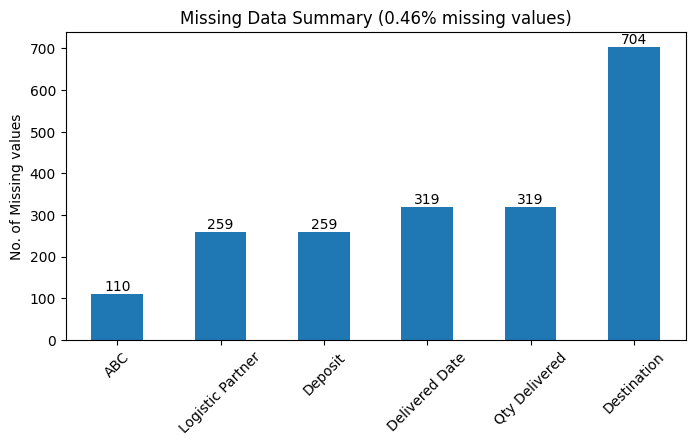

In [10]:
plt.figure(figsize=(8, 4))

def plot_missingdata(df_ml: pd.DataFrame, title: str, xlabel: str, ylabel: str):
    # Number of missing values per column
    missingCount = df_ml.isnull().sum()
    # Total number of missing values
    missing_tot = missingCount.sum()
    # Total number of entries (rows x columns) in the dataset
    total = df_ml.size
    # Calculate percentage of missing values
    missing_percentage = round(((missing_tot / total) * 100), 2)
    print(f"The dataset contains {missing_percentage}% missing values")

    # Keeping only the columns with missing values > 0
    missing = missingCount[missingCount > 0] 
    # Sorting in order of missing values
    missing.sort_values(inplace=True) 
    ax = missing.plot.bar()
    plt.title(title.format(missing_percentage), loc='center')
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)

    # Annotate each bar with its value
    for i, v in enumerate(missing):
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

    plt.show()

# Example usage
plot_missingdata(df_ml, "Missing Data Summary ({}% missing values)", "Column Name", "No. of Missing values")

Missing values present in the dataframe
If the missing values are randomly distributed, it might be MCAR.


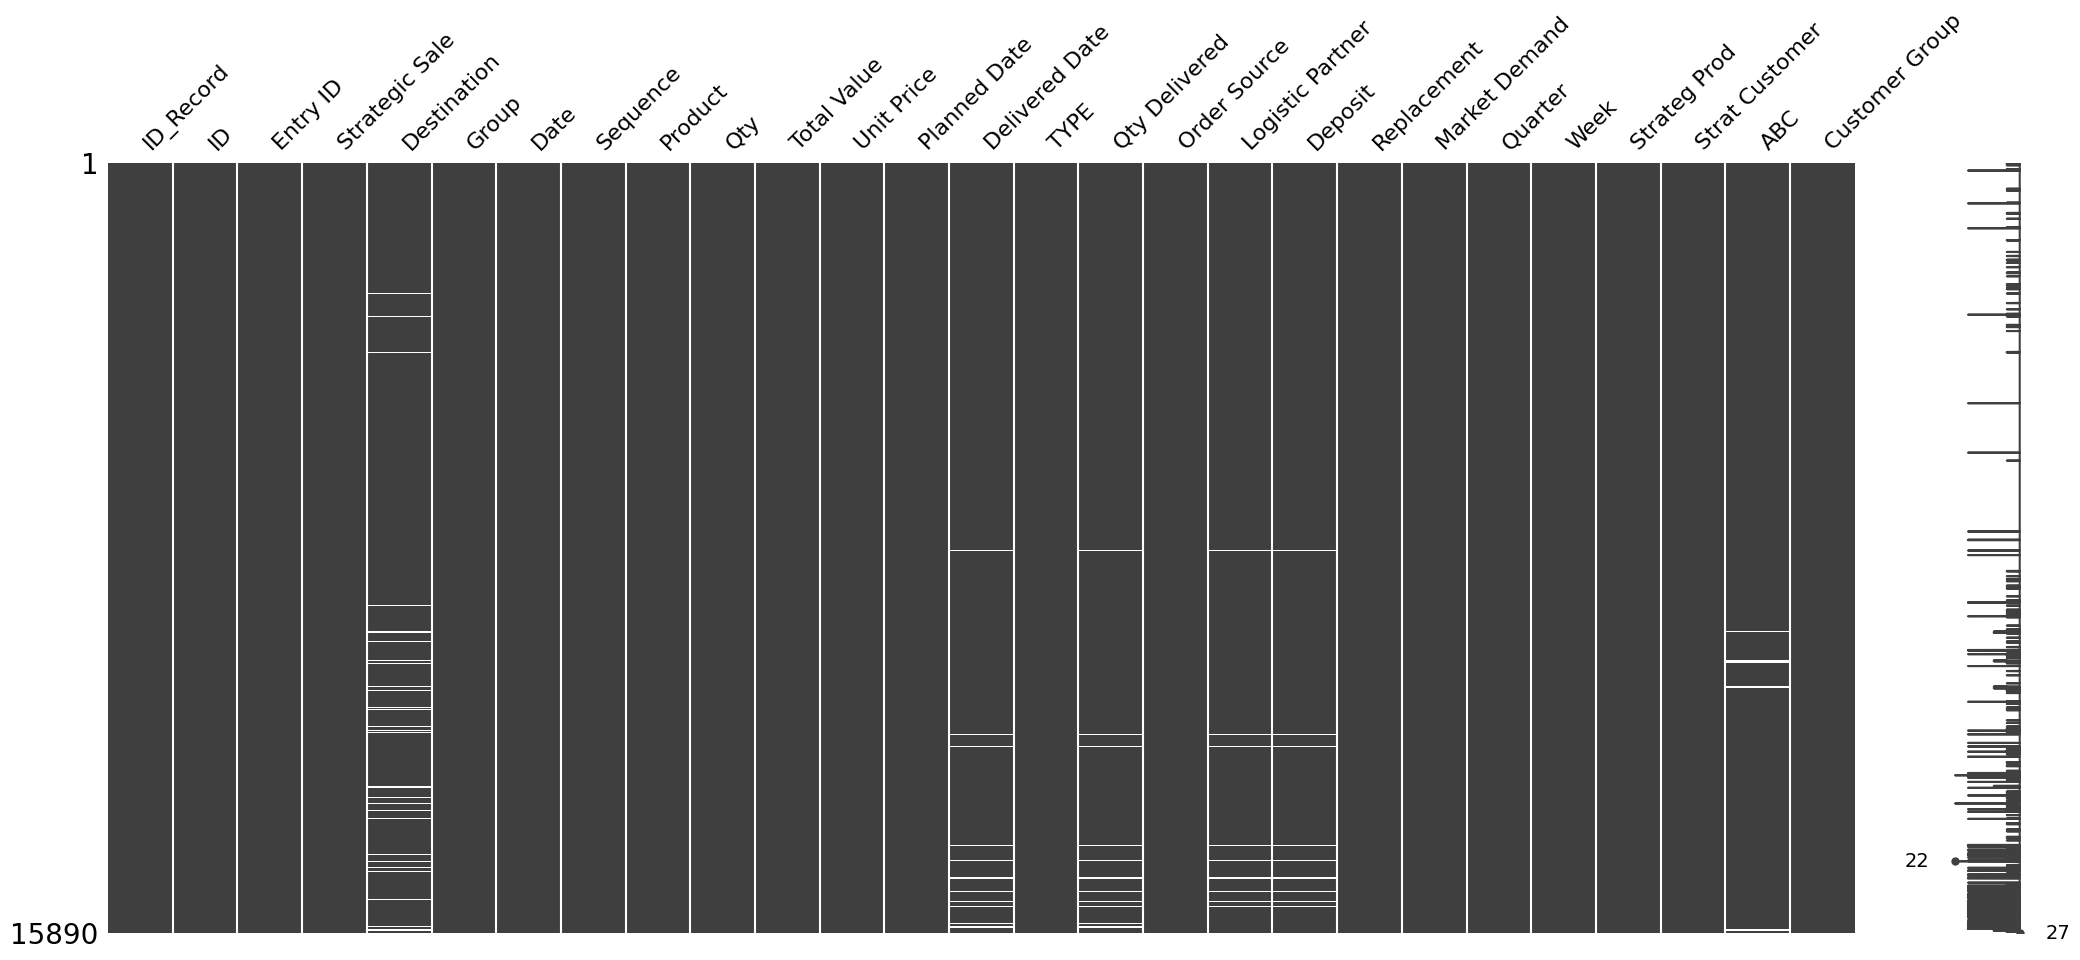

In [11]:
if df_ml.isnull().values.any():
    print("Missing values present in the dataframe")
    msno.matrix(df_ml)
    print("If the missing values are randomly distributed, it might be MCAR.")
else:
    print("No missing values present in the dataframe")

- For Qty delivered, Delivered Date, Logistic Partner and Deposit, it may suggest MAR because they tend to occur simultaneously
- For Destination and ABC it may suggest MCAR because the missingness tends to occur independently

#### Outliers

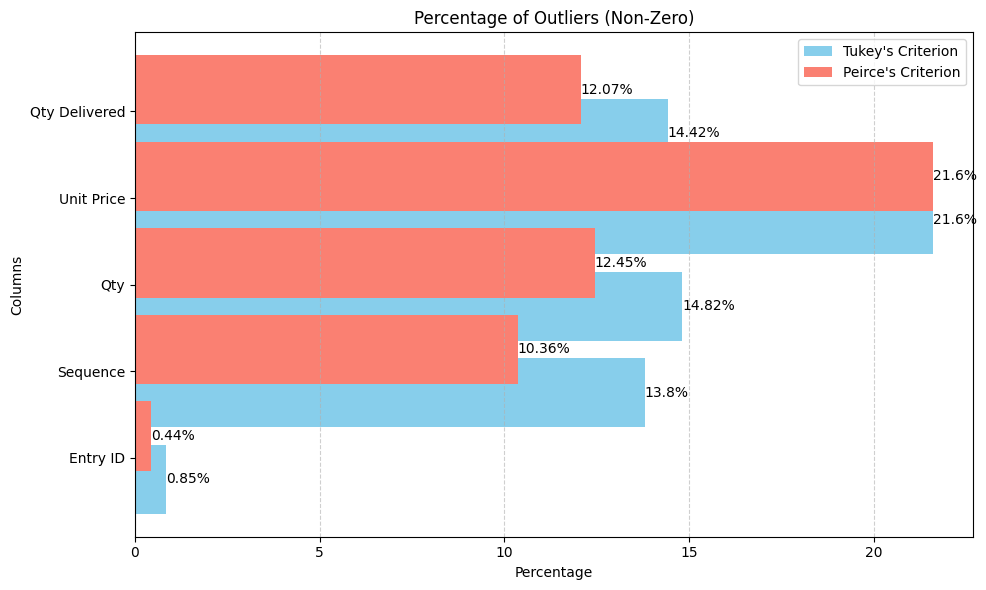

In [12]:
df_ml_tr = df_ml.copy()

def calculate_percentage_of_outliers(df_ml_tr, column_name, criterion='tukey'):
    # Calculate Interquartile Range
    Q1 = df_ml_tr[column_name].quantile(0.25)
    Q3 = df_ml_tr[column_name].quantile(0.75)
    IQR = Q3 - Q1

    if criterion == 'tukey':
        # Identify outliers using Tukey's criterion
        outliers = ((df_ml_tr[column_name] < (Q1 - 1.5 * IQR)) | (df_ml_tr[column_name] > (Q3 + 1.5 * IQR)))
    elif criterion == 'peirce':
        # Identify outliers using Peirce's criterion
        outliers = ((df_ml_tr[column_name] < (Q1 - 2.2 * IQR)) | (df_ml_tr[column_name] > (Q3 + 2.2 * IQR)))

    # Calculate the percentage of outliers
    percentage_of_outliers = round((outliers.sum() / len(df_ml_tr)) * 100, 2)

    return percentage_of_outliers

# Iterate over numerical columns
numerical_columns = df_ml_tr.select_dtypes(include=[np.number]).columns

percentage_outliers_tukey = []
percentage_outliers_peirce = []
columns_with_outliers = []

for column in numerical_columns:
    percentage_tukey = calculate_percentage_of_outliers(df_ml_tr, column)
    percentage_peirce = calculate_percentage_of_outliers(df_ml_tr, column, criterion='peirce')
    if percentage_tukey != 0 or percentage_peirce != 0:
        percentage_outliers_tukey.append(percentage_tukey)
        percentage_outliers_peirce.append(percentage_peirce)
        columns_with_outliers.append(column)

# Plotting the results for columns with non-zero outlier percentages
plt.figure(figsize=(10, 6))

bars_tukey = plt.barh(np.arange(len(columns_with_outliers)), percentage_outliers_tukey, color='skyblue', label="Tukey's Criterion")
bars_peirce = plt.barh(np.arange(len(columns_with_outliers)) + 0.5, percentage_outliers_peirce, color='salmon', label="Peirce's Criterion")

# Add percentage values to the bars
for i, bar in enumerate(bars_tukey):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', ha='left', va='center', color='black')

for i, bar in enumerate(bars_peirce):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', ha='left', va='center', color='black')

plt.yticks(np.arange(len(columns_with_outliers)) + 0.25, columns_with_outliers)
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.title('Percentage of Outliers (Non-Zero)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [13]:
df_ml[df_ml['Delivered Date'].isnull()]

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
156,157,75,19357,1,US,7,9/18/2022,20,4476,361,"$3,017.96",8.36,4/8/2024,NaN,SALE,NaN,Channel2,NaN,NaN,NO,1,2022Q4,3,0,Yes,C,200
832,833,66,19610,0,NL,2,12/18/2022,17,4471,3,$16.83,5.61,2/14/2024,NaN,SALE,NaN,Channel2,NaN,NaN,NO,3,2022Q3,3,0,No,B,3986
1346,1347,66,19633,0,NL,2,1/1/2022,36,4471,1,$5.61,5.61,2/14/2024,NaN,SALE,NaN,Channel2,NaN,NaN,NO,3,2022Q3,5,0,No,B,3986
3130,3131,66,19736,0,GB,2,2/15/2022,3,4440,150,"$1,071.00",7.14,2/14/2024,NaN,SALE,NaN,Channel2,NaN,NaN,NO,3,2022Q3,11,0,No,C,3986
4956,4957,66,19829,0,GB,2,3/28/2022,24,4464,30,$161.70,5.39,5/23/2024,NaN,SALE,NaN,Channel2,NaN,NaN,NO,3,2022Q2,12,0,No,A,3986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793,15794,17,20374,1,US,2,12/31/2022,2,4479,2,$28.34,14.17,12/31/2023,NaN,SALE,NaN,Channel2,NaN,NaN,NO,1,2022Q3,5,0,No,C,684
15794,15795,17,20374,1,US,16,12/31/2022,5,4492,1,$3.43,3.43,12/31/2023,NaN,SALE,NaN,Channel2,C2,L2,NO,1,2022Q3,5,0,No,C,684
15795,15796,17,20374,1,US,7,12/31/2022,4,4461,250,$60.00,0.24,12/31/2023,NaN,SALE,NaN,Channel2,C2,L2,NO,1,2022Q3,5,0,No,C,684
15796,15797,66,20374,0,GB,21,12/31/2022,6,4461,8,$1.92,0.24,12/31/2023,NaN,SALE,NaN,Channel2,NaN,NaN,NO,3,2022Q3,5,0,No,C,3986


In [14]:
### date treatment 
df_ml_tr['Planned Date'] = pd.to_datetime(df_ml_tr['Planned Date'])
df_ml_tr['Date'] = pd.to_datetime(df_ml_tr['Date'])
df_ml_tr['Delivered Date'] = pd.to_datetime(df_ml_tr['Delivered Date'])

### Values treatment 
df_ml_tr['Total Value '] = df_ml_tr['Total Value '].str.replace('$', '').str.replace(',', '')
df_ml_tr['Total Value '] = df_ml_tr['Total Value '].astype(float)

### strip spaces from headers
df_ml_tr.columns = df_ml_tr.columns.str.strip()


##### Checking for all non missing values in QTY were delivered and if they were, impute the same value for Qty delivered

In [15]:
# Filter rows where Qty Delivered is not missing
not_missing_qty_delivered = df_ml_tr.dropna(subset=['Qty Delivered'])

# Check if Qty Delivered matches Qty for each row
not_missing_qty_delivered['Qty_Matches_Qty_Delivered'] = not_missing_qty_delivered['Qty'] == not_missing_qty_delivered['Qty Delivered']

# Show rows where Qty Delivered does not match Qty
mismatched_deliveries = not_missing_qty_delivered[not_missing_qty_delivered['Qty_Matches_Qty_Delivered'] == False]

mismatched_deliveries

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Qty_Matches_Qty_Delivered


In [16]:
# Fill missing values in Qty Delivered with corresponding values from Qty
df_ml_tr['Qty Delivered'].fillna(df_ml_tr['Qty'], inplace=True)
df_ml_tr.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner    259
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                 110
Customer Group        0
dtype: int64

#### Analysing Unit Price column

In [17]:
zero_prices = df_ml_tr[(df_ml_tr['Unit Price'] == 0)]
zero_prices

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
9649,9650,54,20047,0,US,29,2022-07-15,13,4483,8,401.04,0.0,2023-07-15,2023-07-16,SALE,8.0,Channel2,C8,L30,NO,1,2022Q1,7,0,No,NaN,1420
9653,9654,54,20047,0,US,2,2022-07-16,22,4440,2,14.28,0.0,2023-07-15,2023-08-21,SALE,2.0,Channel2,C8,L30,NO,1,2022Q1,7,0,No,C,1420
9654,9655,54,20047,0,US,2,2022-07-16,15,4452,1,19.26,0.0,2023-07-15,2023-07-17,SALE,1.0,Channel2,C8,L30,NO,1,2022Q1,7,0,No,C,1420
9655,9656,66,20047,0,NL,7,2022-07-16,20,4480,5,149.30,0.0,2023-07-16,2023-07-17,SALE,5.0,Channel2,C6,L9,NO,3,2022Q1,7,0,No,B,3986
9657,9658,17,20010,1,US,2,2022-06-21,30,4470,36,746.64,0.0,2023-06-21,2023-06-28,SALE,36.0,Channel2,C2,L2,NO,1,2022Q1,3,0,No,B,684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,15860,66,19396,0,NL,2,2022-10-04,2,4440,1,7.14,0.0,2022-10-04,2023-04-18,SALE,1.0,Channel2,C7,L8,YES,3,2022Q3,7,0,No,C,3986
15863,15864,66,19418,0,NL,2,2022-10-05,2,4440,150,1071.00,0.0,2022-10-05,2023-03-28,SALE,150.0,Channel2,C7,L8,YES,3,2022Q3,7,0,No,C,3986
15871,15872,66,19501,0,NL,2,2022-11-12,3,4484,18,712.98,0.0,2023-10-08,2023-10-01,SALE,18.0,Channel2,C6,L9,NO,3,2022Q1,13,0,No,C,3986
15875,15876,17,19539,1,US,21,2022-11-22,2,4485,750,7927.50,0.0,2022-11-22,2023-02-19,SALE,750.0,Channel2,C2,L2,NO,1,2022Q3,10,0,No,C,684


In [18]:
print('Overal Unit Price Mean: ',df_ml_tr['Unit Price'].mean())
print('Overal Unit Price Mean excluding 0: ',df_ml_tr.loc[df_ml_tr['Unit Price'] != 0, 'Unit Price'].mean())

Overal Unit Price Mean:  10.896334801762116
Overal Unit Price Mean excluding 0:  10.943856899058215


In [19]:
# Mean unit price by Product
mean_unit_price_by_product = df_ml_tr[df_ml_tr['Unit Price'] != 0].groupby('Product')['Unit Price'].mean()

# Mean unit price by Group
mean_unit_price_by_group = df_ml_tr[df_ml_tr['Unit Price'] != 0].groupby('Group')['Unit Price'].mean()

In [20]:
mean_unit_price_by_product

Product
4440     7.14
4450    21.21
4452    19.26
4455    31.44
4460     0.73
4461     0.24
4462     8.41
4463    54.17
4464     5.39
4465    55.75
4466     4.84
4467     4.71
4468     8.14
4470    20.74
4471     5.61
4472     0.14
4473    30.36
4474     6.31
4475    36.07
4476     8.36
4478     0.08
4479    14.17
4480    29.86
4481     2.49
4482     0.45
4483    50.13
4484    39.61
4485    10.57
4486     0.25
4488     7.52
4489    25.83
4490    21.60
4491     6.33
4492     3.43
4493     3.20
4494     6.42
4502     0.14
Name: Unit Price, dtype: float64

In [21]:
# Replace unit price == 0 with the mean unit price for each product
df_ml_tr['Unit Price'] = np.where((df_ml_tr['Unit Price'] == 0) & (df_ml_tr['Product'].isin(mean_unit_price_by_product.index)), 
                                  df_ml_tr['Product'].map(mean_unit_price_by_product), df_ml_tr['Unit Price'])

df_ml_tr[(df_ml_tr['Unit Price'] == 0)]


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group


In [22]:
df_ml_tr['Unit Price'] == 0

0        False
1        False
2        False
3        False
4        False
         ...  
15885    False
15886    False
15887    False
15888    False
15889    False
Name: Unit Price, Length: 15890, dtype: bool

In [23]:
unit_price_after_imputation = df_ml_tr['Unit Price'].mean()
unit_price_after_imputation


10.987076148521082

In [24]:
# Assuming 'unit_price' is the column containing true unit prices and 'imputed_unit_price' is the column containing imputed unit prices
true_unit_price = df_ml['Unit Price']
imputed_unit_price = df_ml_tr['Unit Price']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(true_unit_price, imputed_unit_price)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(true_unit_price, imputed_unit_price, squared=False)

# Calculate R-squared
r_squared = r2_score(true_unit_price, imputed_unit_price)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 0.0907413467589679
Root Mean Squared Error (RMSE): 1.7705948092669013
R-squared: 0.9828771431198788


The Mean Absolute Error (MAE) is approximately 0.0907, indicating that, on average, the imputed unit prices differ from the true unit prices by about 0.0907 units.

The Root Mean Squared Error (RMSE) is approximately 1.7706, indicating the square root of the average of squared differences between the imputed and true unit prices. It provides a measure of the spread of errors, with lower values indicating better accuracy.

The R-squared value of approximately 0.9829 indicates that the imputed unit prices explain about 98.29% of the variance in the true unit prices. R-squared values range from 0 to 1, with higher values indicating better goodness of fit. In this case, a value close to 1 indicates a strong correlation between the imputed and true unit prices.

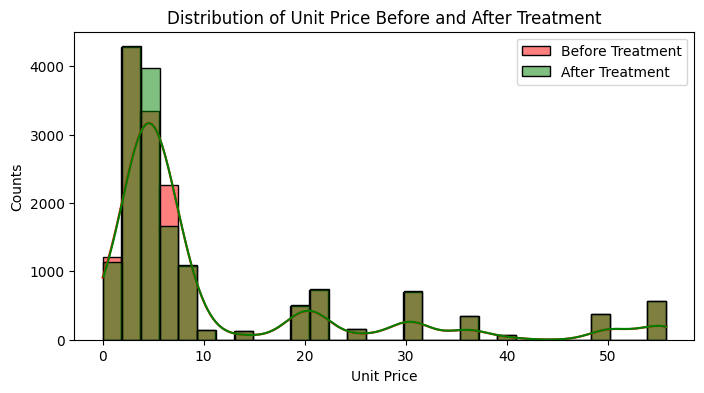

In [25]:

# Plot the distribution of 'Unit Price' in df_ml
plt.figure(figsize=(8, 4))
sns.histplot(df_ml['Unit Price'], color='red', bins=30, kde=True, label='Before Treatment')

# Plot the distribution of 'Unit Price' in df_ml_tr
sns.histplot(df_ml_tr['Unit Price'], color='green', bins=30, kde=True, label='After Treatment')

# Add labels and title
plt.xlabel('Unit Price')
plt.ylabel('Counts')
plt.title('Distribution of Unit Price Before and After Treatment')
plt.legend()

# Show plot
plt.show()

#### Analysing and treating ABC Column

In [26]:
df_ml_tr['ABC'].describe()

count     15780
unique        3
top           C
freq       6692
Name: ABC, dtype: object

In [27]:
df_ml_tr['ABC'].isnull().sum()

110

Count of each unique value in the 'ABC' column:
ABC
C    6692
B    4848
A    4240
Name: count, dtype: int64


<Axes: xlabel='ABC'>

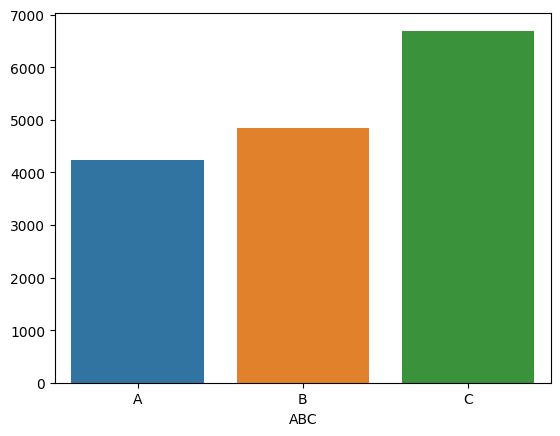

In [28]:
abc_counts = df_ml_tr['ABC'].value_counts()

print("Count of each unique value in the 'ABC' column:")
print(abc_counts)

order = ['A', 'B', 'C']
sns.barplot(x=abc_counts.index, y=abc_counts.values, order=order)

In [29]:
# Initialize an empty DataFrame to store the counts per group for each ABC value
abc_group_counts_df = pd.DataFrame(columns=['ABC', 'Group', 'Count'])

# Get unique values in the 'ABC' column
unique_abc_values = df_ml_tr['ABC'].unique()

# Iterate over each unique ABC value
for abc_value in unique_abc_values:
    # Filter the DataFrame for the current ABC value
    abc_filtered_df = df_ml_tr[df_ml_tr['ABC'] == abc_value]
    
    # Group by 'Group' and get the count for the current ABC value
    abc_group_counts = abc_filtered_df.groupby('Group').size().reset_index(name='Count')
    
    # Add the ABC value to the DataFrame
    abc_group_counts['ABC'] = abc_value
    
    # Concatenate the current counts to the main DataFrame
    abc_group_counts_df = pd.concat([abc_group_counts_df, abc_group_counts], ignore_index=True)

# Print the DataFrame
print("Counts per group for each ABC value:")
abc_group_counts_df


Counts per group for each ABC value:


,ABC,Group,Count
0,C,2,1933
1,C,3,322
2,C,5,67
3,C,6,221
4,C,7,655
...,...,...,...
61,B,25,488
62,B,26,2
63,B,27,95
64,B,28,75


In [30]:
# Initialize an empty DataFrame to store the counts per group for each ABC value
abc_product_counts_df = pd.DataFrame(columns=['ABC', 'Product', 'Count'])

# Get unique values in the 'ABC' column
unique_abc_values = df_ml_tr['ABC'].unique()

# Iterate over each unique ABC value
for abc_value in unique_abc_values:
    # Filter the DataFrame for the current ABC value
    abc_filtered_df = df_ml_tr[df_ml_tr['ABC'] == abc_value]
    
    # Group by 'Product' and get the count for the current ABC value
    abc_product_counts = abc_filtered_df.groupby('Product').size().reset_index(name='Count')
    
    # Add the ABC value to the DataFrame
    abc_product_counts['ABC'] = abc_value
    
    # Concatenate the current counts to the main DataFrame
    abc_product_counts_df = pd.concat([abc_product_counts_df, abc_product_counts], ignore_index=True)

# Print the DataFrame
print("Counts per product for each ABC value:")
abc_product_counts_df

Counts per product for each ABC value:


,ABC,Product,Count
0,C,4440,670
1,C,4450,193
2,C,4452,500
3,C,4460,138
4,C,4461,255
5,C,4468,137
6,C,4472,288
7,C,4474,416
8,C,4476,514
9,C,4478,89


In [31]:
# Group the data by 'Product' and count the unique 'ABC' values within each group
product_abc_counts = df_ml_tr.groupby('Product')['ABC'].nunique()

# Filter out products with more than one unique ABC value
products_with_multiple_abc = product_abc_counts[product_abc_counts > 1]

# Print products with multiple ABC classifications
print("Products with multiple ABC classifications:")
products_with_multiple_abc

Products with multiple ABC classifications:


Series([], Name: ABC, dtype: int64)

In [32]:
# Group the data by 'Product' and count the number of unique 'ABC' classifications within each group
abc_counts_per_product = abc_product_counts_df.groupby('Product')['ABC'].nunique()

# Print products with only one ABC classification
products_with_single_abc = abc_counts_per_product[abc_counts_per_product == 1].index.tolist()
print("Products with only one ABC classification:")
print(products_with_single_abc)

Products with only one ABC classification:
[4440, 4450, 4452, 4455, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4502]


In [33]:
# Define the function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for correlation between 'ABC' and each column
cramers_v_scores = {}
for column in df_ml_tr.columns:
    if column != 'ABC':  # Skip correlation with 'ABC' itself
        cramers_v_score = cramers_v(df_ml_tr['ABC'], df_ml_tr[column])
        cramers_v_scores[column] = cramers_v_score

# Sort the dictionary by Cramér's V score in descending order
sorted_scores = sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted columns and their Cramér's V scores
for column, score in sorted_scores:
    print(f"Cramér's V for correlation between 'ABC' and '{column}':", score)
    

Cramér's V for correlation between 'ABC' and 'ID_Record': inf
Cramér's V for correlation between 'ABC' and 'Product': 0.9989219009454019
Cramér's V for correlation between 'ABC' and 'Unit Price': 0.9988584471164705
Cramér's V for correlation between 'ABC' and 'Total Value': 0.9164836886100388
Cramér's V for correlation between 'ABC' and 'Group': 0.32918148122323776
Cramér's V for correlation between 'ABC' and 'Entry ID': 0.1914547908253608
Cramér's V for correlation between 'ABC' and 'Delivered Date': 0.16985227541500025
Cramér's V for correlation between 'ABC' and 'Planned Date': 0.16483645313054338
Cramér's V for correlation between 'ABC' and 'Qty': 0.15517916979966667
Cramér's V for correlation between 'ABC' and 'Qty Delivered': 0.15517916979966667
Cramér's V for correlation between 'ABC' and 'Replacement': 0.13993315298342235
Cramér's V for correlation between 'ABC' and 'Date': 0.1381357326735253
Cramér's V for correlation between 'ABC' and 'Logistic Partner': 0.09523836384634433
C

#### The strength of correlation can be interpreted as follows for Cramér's V:

0.00 to 0.10: Negligible association.

0.10 to 0.20: Weak association.

0.20 to 0.40: Moderate association.

0.40 to 0.60: Relatively strong association.

0.60 to 0.80: Strong association.

0.80 to 1.00: Very strong association.

In [34]:
# Select the top 5 correlated columns
top_correlations = sorted_scores[:6]

# Print the top 5 correlated columns and their Cramér's V scores
for column, score in top_correlations:
    print(f"Cramér's V for correlation between 'ABC' and '{column}':", score)

Cramér's V for correlation between 'ABC' and 'ID_Record': inf
Cramér's V for correlation between 'ABC' and 'Product': 0.9989219009454019
Cramér's V for correlation between 'ABC' and 'Unit Price': 0.9988584471164705
Cramér's V for correlation between 'ABC' and 'Total Value': 0.9164836886100388
Cramér's V for correlation between 'ABC' and 'Group': 0.32918148122323776
Cramér's V for correlation between 'ABC' and 'Entry ID': 0.1914547908253608


##### Predicting Missing values for ABC usinf Random ForestClassifier

In [35]:
# Check for NaN values in X
nan_values = df_ml_tr[['Product', 'Unit Price', 'Total Value', 'Group']].isna().any()
print(nan_values)

Product        False
Unit Price     False
Total Value    False
Group          False
dtype: bool


In [36]:
# Check for NaN values in Y
nan_values_abc = df_ml_tr[['ABC']].isna().any()
print(nan_values_abc)

ABC    True
dtype: bool


In [37]:
df_ml_tr.dtypes

ID_Record                    int64
ID                           int64
Entry ID                     int64
Strategic Sale               int64
Destination                 object
Group                        int64
Date                datetime64[ns]
Sequence                     int64
Product                      int64
Qty                          int64
Total Value                float64
Unit Price                 float64
Planned Date        datetime64[ns]
Delivered Date      datetime64[ns]
TYPE                        object
Qty Delivered              float64
Order Source                object
Logistic Partner            object
Deposit                     object
Replacement                 object
Market Demand                int64
Quarter                     object
Week                         int64
Strateg Prod                 int64
Strat Customer              object
ABC                         object
Customer Group               int64
dtype: object

In [38]:
df_ml_tr['Unit Price'] == 0

0        False
1        False
2        False
3        False
4        False
         ...  
15885    False
15886    False
15887    False
15888    False
15889    False
Name: Unit Price, Length: 15890, dtype: bool

In [39]:
df_test_predict_ABC = df_ml_tr.copy()


In [40]:
# Check for NaN values in features
features = ['Product', 'Unit Price', 'Total Value', 'Group']
print("NaN values in the features:")
print(df_test_predict_ABC[features].isnull().sum())

# Check for NaN values in the target variable
print("NaN values in the target variable (ABC):")
print(df_test_predict_ABC['ABC'].isnull().sum())

# Drop rows with NaN values in both features and the target variable
df_no_nan = df_test_predict_ABC.dropna(subset=features + ['ABC'])

# Define the features and target variable
X = df_no_nan[features]
y = df_no_nan['ABC']

# Define preprocessing steps
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features),
        ('cat', categorical_transformer, features)  # Assuming all features are categorical
    ])

# Define the model
model = RandomForestClassifier()

# Create and fit the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict missing values
predicted_ABC = pipeline.predict(X)

# Impute missing values in the original DataFrame
df_test_predict_ABC['ABC'].fillna(pd.Series(predicted_ABC), inplace=True)

# Check if there are still NaN values in the target variable
print("NaN values in the target variable (ABC) after imputation:")
print(df_test_predict_ABC['ABC'].isnull().sum())

NaN values in the features:
Product        0
Unit Price     0
Total Value    0
Group          0
dtype: int64
NaN values in the target variable (ABC):
110
NaN values in the target variable (ABC) after imputation:
29


In [41]:
# Generate predictions for the prediction set
pred_y = pipeline.predict(X)  # Assuming X is the feature matrix for the prediction set

# Define the actual target values for the prediction set
y_true = df_test_predict_ABC['ABC'].loc[X.index]

# Calculate accuracy
accuracy = accuracy_score(y_true, pred_y)

# Calculate precision
precision = precision_score(y_true, pred_y, average='weighted')

# Calculate recall
recall = recall_score(y_true, pred_y, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, pred_y, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, pred_y)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
Confusion Matrix:
[[4240    0    0]
 [   0 4848    0]
 [   0    0 6692]]


In [42]:
# Check for NaN values in features
features = ['Product', 'Unit Price', 'Total Value', 'Group']
print("NaN values in the features:")
print(df_test_predict_ABC[features].isnull().sum())

# Check for NaN values in the target variable
print("NaN values in the target variable (ABC):")
print(df_test_predict_ABC['ABC'].isnull().sum())

# Drop rows with NaN values in both features and the target variable
df_no_nan = df_test_predict_ABC.dropna(subset=features + ['ABC'])

# Define the features and target variable
X = df_no_nan[features]
y = df_no_nan['ABC']

# Define preprocessing steps
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features),
        ('cat', categorical_transformer, features)  # Assuming all features are categorical
    ])

# Define the model
model = RandomForestClassifier()

# Create and fit the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict missing values
predicted_ABC = pipeline.predict(X)

# Impute missing values in the original DataFrame
df_test_predict_ABC['ABC'].fillna(pd.Series(predicted_ABC), inplace=True)

# Check if there are still NaN values in the target variable
print("NaN values in the target variable (ABC) after imputation:")
print(df_test_predict_ABC['ABC'].isnull().sum())

NaN values in the features:
Product        0
Unit Price     0
Total Value    0
Group          0
dtype: int64
NaN values in the target variable (ABC):
29
NaN values in the target variable (ABC) after imputation:
6


In [43]:
# Generate predictions for the prediction set
pred_y = pipeline.predict(X)  # Assuming X is the feature matrix for the prediction set

# Define the actual target values for the prediction set
y_true = df_test_predict_ABC['ABC'].loc[X.index]

# Calculate accuracy
accuracy = accuracy_score(y_true, pred_y)

# Calculate precision
precision = precision_score(y_true, pred_y, average='weighted')

# Calculate recall
recall = recall_score(y_true, pred_y, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, pred_y, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, pred_y)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 99.67%
Precision: 99.67%
Recall: 99.67%
F1 Score: 99.67%
Confusion Matrix:
[[4252    3   10]
 [   8 4851   13]
 [  13    5 6706]]


In [44]:
# Check for NaN values in features
features = ['Product', 'Unit Price', 'Total Value', 'Group']
print("NaN values in the features:")
print(df_test_predict_ABC[features].isnull().sum())

# Check for NaN values in the target variable
print("NaN values in the target variable (ABC):")
print(df_test_predict_ABC['ABC'].isnull().sum())

# Drop rows with NaN values in both features and the target variable
df_no_nan = df_test_predict_ABC.dropna(subset=features + ['ABC'])

# Define the features and target variable
X = df_no_nan[features]
y = df_no_nan['ABC']

# Define preprocessing steps
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features),
        ('cat', categorical_transformer, features)  # Assuming all features are categorical
    ])

# Define the model
model = RandomForestClassifier()

# Create and fit the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict missing values
predicted_ABC = pipeline.predict(X)

# Impute missing values in the original DataFrame
df_test_predict_ABC['ABC'].fillna(pd.Series(predicted_ABC), inplace=True)

# Check if there are still NaN values in the target variable
print("NaN values in the target variable (ABC) after imputation:")
print(df_test_predict_ABC['ABC'].isnull().sum())

NaN values in the features:
Product        0
Unit Price     0
Total Value    0
Group          0
dtype: int64
NaN values in the target variable (ABC):
6
NaN values in the target variable (ABC) after imputation:
3


In [45]:
# Generate predictions for the prediction set
pred_y = pipeline.predict(X)  # Assuming X is the feature matrix for the prediction set

# Define the actual target values for the prediction set
y_true = df_test_predict_ABC['ABC'].loc[X.index]

# Calculate accuracy
accuracy = accuracy_score(y_true, pred_y)

# Calculate precision
precision = precision_score(y_true, pred_y, average='weighted')

# Calculate recall
recall = recall_score(y_true, pred_y, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, pred_y, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, pred_y)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 99.58%
Precision: 99.58%
Recall: 99.58%
F1 Score: 99.58%
Confusion Matrix:
[[4254    5    9]
 [  14 4854   15]
 [  17    7 6709]]


In [46]:
df_test_predict_ABC.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner    259
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   3
Customer Group        0
dtype: int64

In [47]:
# Compute Cumulative Distribution Functions (CDFs)
cdf_before = df_ml_tr['ABC'].value_counts(normalize=True).sort_index().cumsum()
cdf_after = df_test_predict_ABC['ABC'].value_counts(normalize=True).sort_index().cumsum()

# Perform KS Test
ks_statistic, p_value = stats.ks_2samp(cdf_before, cdf_after)

# Interpret Results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Distributions are different.")
else:
    print("Fail to reject null hypothesis: Distributions are similar.")

KS Statistic: 0.3333333333333333
P-value: 1.0
Fail to reject null hypothesis: Distributions are similar.


In [48]:
df_test_predict_ABC

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,1,57,17592,1,NaN,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,NO,2,2022Q3,4,0,YES,C,176
1,2,57,17899,1,NaN,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,NO,2,2022Q3,9,0,YES,C,176
2,3,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,YES,1,2022Q3,1,0,No,B,684
15886,15887,17,19580,1,US,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,B,684
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,NaN,684
15888,15889,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,NaN,684


#### Fill the remaining missing values in ABC by analysing manually the top 3 or 4 columns that correlate with ABC

In [49]:
filtered_df = df_test_predict_ABC[(df_test_predict_ABC['Product'] == 4467)& (df_test_predict_ABC['TYPE'] == 'SALE')&(df_test_predict_ABC['Unit Price'] == 4.71)]
filtered_df


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
16,17,75,18688,1,US,10,2022-01-11,10,4467,480,2260.80,4.71,2023-05-10,2023-05-22,SALE,480.0,Channel2,C7,L8,YES,1,2022Q4,9,0,Yes,A,200
32,33,66,18804,0,NL,10,2022-02-23,17,4467,23,108.33,4.71,2023-02-11,2023-04-26,SALE,23.0,Channel2,C6,L9,NO,3,2022Q3,8,0,No,A,3986
35,36,66,18804,0,NL,10,2022-02-23,17,4467,39,183.69,4.71,2023-02-11,2023-02-14,SALE,39.0,Channel2,C6,L9,NO,3,2022Q3,10,0,No,A,3986
36,37,66,18804,0,NL,10,2022-02-23,17,4467,235,1106.85,4.71,2023-06-28,2023-07-01,SALE,235.0,Channel2,C6,L9,NO,3,2022Q3,8,0,No,A,3986
41,42,66,18804,0,NL,10,2022-02-23,17,4467,10,47.10,4.71,2023-02-11,2023-04-26,SALE,10.0,Channel2,C6,L9,NO,3,2022Q3,10,0,No,A,3986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15800,15801,66,20374,0,GB,21,2022-12-31,5,4467,4,18.84,4.71,2023-12-31,2023-12-31,SALE,4.0,Channel2,C7,L8,NO,3,2022Q3,5,0,No,A,3986
15867,15868,55,19464,1,DE,2,2022-10-26,3,4467,29,136.59,4.71,2023-03-11,2023-04-16,SALE,29.0,Channel2,C6,L9,NO,3,2022Q3,2,0,No,A,521
15873,15874,66,19522,0,NL,2,2022-11-19,2,4467,6,28.26,4.71,2022-11-19,2023-04-19,SALE,6.0,Channel2,C6,L9,NO,3,2022Q3,2,0,No,A,3986
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,NaN,684


In [50]:
# Calculate the mode of 'ABC'
mode_ABC = filtered_df['ABC'].mode()[0]
mode_ABC

'A'

In [51]:
filtered_df['ABC'].value_counts()

ABC
A    606
Name: count, dtype: int64

In [52]:
# Replace missing values in 'ABC' with the mode
df_test_predict_ABC.loc[(df_test_predict_ABC['Product'] == 4467) & (df_test_predict_ABC['TYPE'] == 'SALE') & (df_test_predict_ABC['Unit Price'] == 4.71) & (df_test_predict_ABC['ABC'].isnull()), 'ABC'] = mode_ABC
df_test_predict_ABC.isnull().sum()


ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner    259
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   1
Customer Group        0
dtype: int64

In [53]:
filtered_df_2 = df_test_predict_ABC[(df_test_predict_ABC['Product'] == 4492)&(df_test_predict_ABC['TYPE'] == 'SALE')&(df_test_predict_ABC['Unit Price']) &(df_test_predict_ABC['Entry ID'] == 19579)]
filtered_df_2


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
213,214,66,19579,0,GB,21,2022-12-03,2,4492,12,41.16,3.43,2022-12-03,2022-12-19,SALE,12.0,Channel2,C7,L8,NO,3,2022Q3,1,0,No,C,3986
15877,15878,66,19579,0,GB,21,2022-12-03,2,4492,12,41.16,3.43,2022-12-03,2022-12-19,SALE,12.0,Channel2,C7,L8,NO,3,2022Q3,1,0,No,A,3986
15889,15890,66,19579,0,GB,21,2022-12-03,2,4492,12,41.16,3.43,2022-12-03,2022-12-19,SALE,12.0,Channel2,C7,L8,NO,3,2022Q3,1,0,No,NaN,3986


In [54]:
# Calculate the mode of 'ABC'
mode_ABC_2 = filtered_df_2['ABC'].mode()[0]
mode_ABC_2

'A'

In [55]:
filtered_df_2['ABC'].value_counts()

ABC
C    1
A    1
Name: count, dtype: int64

In [56]:
# Replace missing values in 'ABC' with the mode
df_test_predict_ABC.loc[(df_test_predict_ABC['Product'] == 4492) & 
                        (df_test_predict_ABC['TYPE'] == 'SALE') & 
                        (df_test_predict_ABC['Unit Price'].notnull()) & 
                        (df_test_predict_ABC['Entry ID'] == 19579), 'ABC'] = mode_ABC_2

# Check for NaN values after replacement
df_test_predict_ABC.isnull().sum()


ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner    259
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

In [57]:
df_test_predict_ABC

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,1,57,17592,1,NaN,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,NO,2,2022Q3,4,0,YES,C,176
1,2,57,17899,1,NaN,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,NO,2,2022Q3,9,0,YES,C,176
2,3,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,YES,1,2022Q3,1,0,No,B,684
15886,15887,17,19580,1,US,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,B,684
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,A,684
15888,15889,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,A,684


In [58]:
# Compute Cumulative Distribution Functions (CDFs)
cdf_before = df_ml_tr['ABC'].value_counts(normalize=True).sort_index().cumsum()
cdf_after = df_test_predict_ABC['ABC'].value_counts(normalize=True).sort_index().cumsum()

# Perform KS Test
ks_statistic, p_value = stats.ks_2samp(cdf_before, cdf_after)

# Interpret Results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Distributions are different.")
else:
    print("Fail to reject null hypothesis: Distributions are similar.")

KS Statistic: 0.3333333333333333
P-value: 1.0
Fail to reject null hypothesis: Distributions are similar.


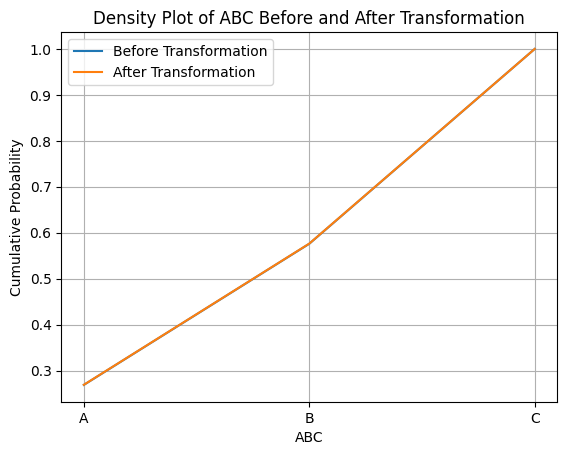

In [59]:
# Plot CDFs
plt.plot(cdf_before.index, cdf_before, label='Before Transformation')
plt.plot(cdf_after.index, cdf_after, label='After Transformation')

# Add labels and legend
plt.xlabel('ABC')
plt.ylabel('Cumulative Probability')
plt.title('Density Plot of ABC Before and After Transformation')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

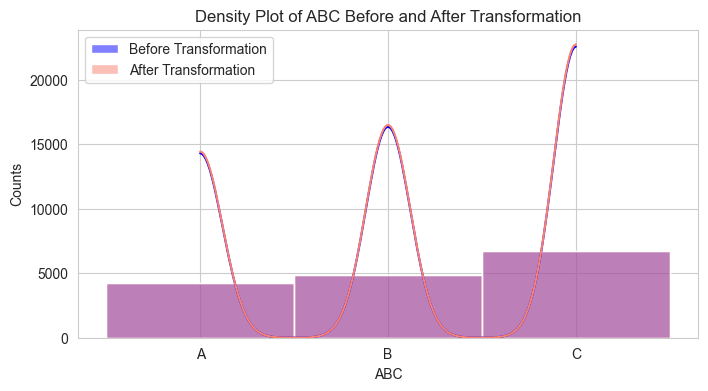

In [60]:
# Define the order of categories
order = ['A', 'B', 'C']

# Set the style of seaborn
sns.set_style('whitegrid')

# Preprocess the data to order the categories
df_ml_tr['ABC'] = df_ml_tr['ABC'].astype('category').cat.set_categories(order)
df_test_predict_ABC['ABC'] = df_test_predict_ABC['ABC'].astype('category').cat.set_categories(order)

# Plot the distribution before transformation
plt.figure(figsize=(8, 4))
sns.histplot(df_ml_tr['ABC'], color='blue', bins=30, kde=True, label='Before Transformation')

# Plot the distribution after transformation
sns.histplot(df_test_predict_ABC['ABC'], color='salmon', bins=30, kde=True, label='After Transformation')

# Add labels and title
plt.xlabel('ABC')
plt.ylabel('Counts')
plt.title('Density Plot of ABC Before and After Transformation')
plt.legend()

# Show plot
plt.show()

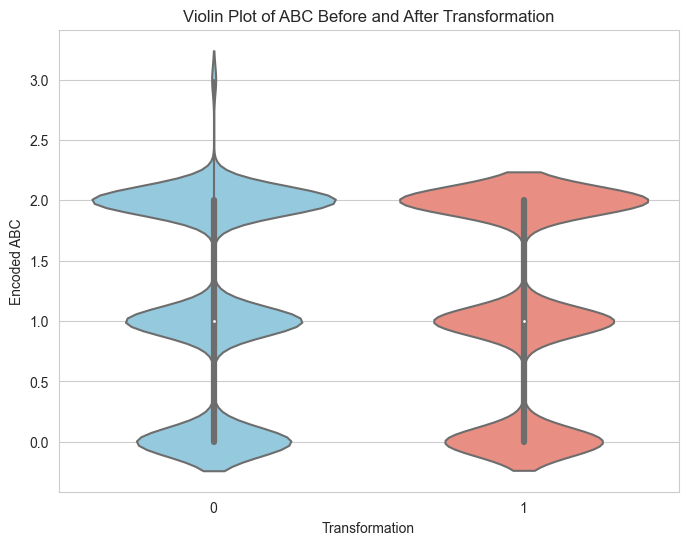

In [61]:
# Make a copy of the original datasets
df_ml_tr_copy = df_ml_tr.copy()
df_test_predict_ABC_copy = df_test_predict_ABC.copy()

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'ABC' categories
df_ml_tr_copy['ABC_encoded'] = label_encoder.fit_transform(df_ml_tr_copy['ABC'])
df_test_predict_ABC_copy['ABC_encoded'] = label_encoder.transform(df_test_predict_ABC_copy['ABC'])

# Set the style of seaborn
sns.set_style('whitegrid')

# Create a violin plot for 'ABC' before and after transformation
plt.figure(figsize=(8, 6))
sns.violinplot(data=[df_ml_tr_copy['ABC_encoded'], df_test_predict_ABC_copy['ABC_encoded']], palette=['skyblue', 'salmon'])
plt.xlabel('Transformation')
plt.ylabel('Encoded ABC')
plt.title('Violin Plot of ABC Before and After Transformation')

# Show plot
plt.show()


In [62]:
df_test_predict_ABC

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,1,57,17592,1,NaN,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,NO,2,2022Q3,4,0,YES,C,176
1,2,57,17899,1,NaN,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,NO,2,2022Q3,9,0,YES,C,176
2,3,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,YES,1,2022Q3,1,0,No,B,684
15886,15887,17,19580,1,US,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,B,684
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,A,684
15888,15889,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,A,684


In [63]:
df_test_predict_ABC.dtypes

ID_Record                    int64
ID                           int64
Entry ID                     int64
Strategic Sale               int64
Destination                 object
Group                        int64
Date                datetime64[ns]
Sequence                     int64
Product                      int64
Qty                          int64
Total Value                float64
Unit Price                 float64
Planned Date        datetime64[ns]
Delivered Date      datetime64[ns]
TYPE                        object
Qty Delivered              float64
Order Source                object
Logistic Partner            object
Deposit                     object
Replacement                 object
Market Demand                int64
Quarter                     object
Week                         int64
Strateg Prod                 int64
Strat Customer              object
ABC                       category
Customer Group               int64
dtype: object

In [64]:
df_ml_tr = df_test_predict_ABC.copy()
df_ml_tr.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner    259
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

#### Analysing and treating Destination Column

Attempt to replace missing values in Destination using RandomForest Classifier

In [65]:
# Define the function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for correlation between 'ABC' and each column
cramers_v_scores = {}
for column in df_ml_tr.columns:
    if column != 'ABC':  # Skip correlation with 'ABC' itself
        cramers_v_score = cramers_v(df_ml_tr['ABC'], df_ml_tr[column])
        cramers_v_scores[column] = cramers_v_score

# Sort the dictionary by Cramér's V score in descending order
sorted_scores = sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted columns and their Cramér's V scores
for column, score in sorted_scores:
    print(f"Cramér's V for correlation between 'ABC' and '{column}':", score)

    

Cramér's V for correlation between 'ABC' and 'ID_Record': nan
Cramér's V for correlation between 'ABC' and 'Product': 0.9917667321541
Cramér's V for correlation between 'ABC' and 'Unit Price': 0.9917347622656653
Cramér's V for correlation between 'ABC' and 'Total Value': 0.9104224780346137
Cramér's V for correlation between 'ABC' and 'Group': 0.3274150179698539
Cramér's V for correlation between 'ABC' and 'Entry ID': 0.1914638499523104
Cramér's V for correlation between 'ABC' and 'Delivered Date': 0.16955547249042782
Cramér's V for correlation between 'ABC' and 'Planned Date': 0.16379827650188675
Cramér's V for correlation between 'ABC' and 'Qty': 0.15392433965340074
Cramér's V for correlation between 'ABC' and 'Qty Delivered': 0.15392433965340074
Cramér's V for correlation between 'ABC' and 'Replacement': 0.1393028402036228
Cramér's V for correlation between 'ABC' and 'Date': 0.1375447248171355
Cramér's V for correlation between 'ABC' and 'Logistic Partner': 0.09520517630196677
Cramér

In [66]:
# Select the top 5 correlated columns
top_correlations = sorted_scores[:6]

# Print the top 5 correlated columns and their Cramér's V scores
for column, score in top_correlations:
    print(f"Cramér's V for correlation between 'ABC' and '{column}':", score)

Cramér's V for correlation between 'ABC' and 'ID_Record': nan
Cramér's V for correlation between 'ABC' and 'Product': 0.9917667321541
Cramér's V for correlation between 'ABC' and 'Unit Price': 0.9917347622656653
Cramér's V for correlation between 'ABC' and 'Total Value': 0.9104224780346137
Cramér's V for correlation between 'ABC' and 'Group': 0.3274150179698539
Cramér's V for correlation between 'ABC' and 'Entry ID': 0.1914638499523104


In [67]:
df_test_predict_destination = df_ml_tr.copy()
df_test_predict_destination.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner    259
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

In [68]:
# Check for NaN values in features
features = ['Product', 'Unit Price', 'Total Value', 'Group']
print("NaN values in the features:")
print(df_test_predict_destination[features].isnull().sum())

# Check for NaN values in the target variable
print("NaN values in the target variable (Destination):")
print(df_test_predict_destination['Destination'].isnull().sum())

# Drop rows with NaN values in both features and the target variable
df_no_nan = df_test_predict_destination.dropna(subset=features + ['Destination'])

# Define the features and target variable
X = df_no_nan[features]
y = df_no_nan['Destination']

# Define preprocessing steps
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features), # Handle numerical features
        ('cat', categorical_transformer, features)  # Handle categorical features
    ])

# Define the model
model = RandomForestClassifier()

# Create and fit the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict missing values
predicted_Destination = pipeline.predict(X)

# Impute missing values in the original DataFrame
df_test_predict_destination['Destination'].fillna(pd.Series(predicted_Destination), inplace=True)

# Check if there are still NaN values in the target variable
print("NaN values in the target variable (Destination) after imputation:")
print(df_test_predict_destination['Destination'].isnull().sum())

NaN values in the features:
Product        0
Unit Price     0
Total Value    0
Group          0
dtype: int64
NaN values in the target variable (Destination):
704
NaN values in the target variable (Destination) after imputation:
67


In [69]:
# Generate predictions for the prediction set
pred_y = pipeline.predict(X)  # Assuming X is the feature matrix for the prediction set

# Define the actual target values for the prediction set
y_true = df_test_predict_destination['Destination'].loc[X.index]

# Calculate accuracy
accuracy = accuracy_score(y_true, pred_y)

# Calculate precision
precision = precision_score(y_true, pred_y, average='weighted')

# Calculate recall
recall = recall_score(y_true, pred_y, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, pred_y, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, pred_y)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 70.62%
Precision: 70.48%
Recall: 70.62%
F1 Score: 69.79%
Confusion Matrix:
[[   1    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   12    4    1    0    2    0    0    0    0    6    0    0    9]
 [   0    0  448    0    2   53    0    0    1    0  247    0    0  353]
 [   0    0    0   66    0    4    0    0    0    0   14    0    1   35]
 [   0    0    1    3   27    2    0    0    0    0    7    0    0   54]
 [   0    0   19    5    0  553    0    1    0    0  325    0    1  365]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    2    0    9    0    0    3    0    0    4]
 [   0    0    0    0    0    0    0    0    1    0    1    0    0    2]
 [   0    0    4    2    0    0    0    0    0    6    7    0    0   29]
 [   0    1   79    9    2  120    0    2    1    0 4032    0    1 1220]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    3]
 [   0    0    1    1    0    2    0   

In [70]:
# Check for NaN values in features
features = ['Product', 'Unit Price', 'Total Value', 'Group']
print("NaN values in the features:")
print(df_test_predict_destination[features].isnull().sum())

# Check for NaN values in the target variable
print("NaN values in the target variable (Destination):")
print(df_test_predict_destination['Destination'].isnull().sum())

# Drop rows with NaN values in both features and the target variable
df_no_nan = df_test_predict_destination.dropna(subset=features + ['Destination'])

# Define the features and target variable
X = df_no_nan[features]
y = df_no_nan['Destination']

# Define preprocessing steps
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features), # Handle numerical features
        ('cat', categorical_transformer, features)  # Handle categorical features
    ])

# Define the model
model = RandomForestClassifier()

# Create and fit the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict missing values
predicted_Destination = pipeline.predict(X)

# Impute missing values in the original DataFrame
df_test_predict_destination['Destination'].fillna(pd.Series(predicted_Destination), inplace=True)

# Check if there are still NaN values in the target variable
print("NaN values in the target variable (Destination) after imputation:")
print(df_test_predict_destination['Destination'].isnull().sum())

NaN values in the features:
Product        0
Unit Price     0
Total Value    0
Group          0
dtype: int64
NaN values in the target variable (Destination):
67
NaN values in the target variable (Destination) after imputation:
23


In [71]:
# Generate predictions for the prediction set
pred_y = pipeline.predict(X)  # Assuming X is the feature matrix for the prediction set

# Define the actual target values for the prediction set
y_true = df_test_predict_destination['Destination'].loc[X.index]

# Calculate accuracy
accuracy = accuracy_score(y_true, pred_y)

# Calculate precision
precision = precision_score(y_true, pred_y, average='weighted')

# Calculate recall
recall = recall_score(y_true, pred_y, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, pred_y, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, pred_y)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 70.38%
Precision: 70.20%
Recall: 70.38%
F1 Score: 69.49%
Confusion Matrix:
[[   1    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   14    4    1    0    1    0    0    0    0    4    0    0   11]
 [   0    0  461    1    1   45    0    0    1    0  252    0    0  377]
 [   0    0    0   70    0    4    0    0    0    0   10    0    0   37]
 [   0    0    4    3   26    2    0    0    0    0    6    0    0   53]
 [   0    1   23    5    1  540    0    1    0    0  351    0    0  378]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    8    0    0    5    0    0    4]
 [   0    0    0    0    0    0    0    0    1    0    1    0    0    2]
 [   0    0    4    2    0    0    0    0    0    7    8    0    0   28]
 [   0    2   84   14    4  104    0    0    1    1 4133    0    0 1370]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    2]
 [   0    0    1    1    0    1    0   

In [72]:
# Check for NaN values in features
features = ['Product', 'Unit Price', 'Total Value', 'Group']
print("NaN values in the features:")
print(df_test_predict_destination[features].isnull().sum())

# Check for NaN values in the target variable
print("NaN values in the target variable (Destination):")
print(df_test_predict_destination['Destination'].isnull().sum())

# Drop rows with NaN values in both features and the target variable
df_no_nan = df_test_predict_destination.dropna(subset=features + ['Destination'])

# Define the features and target variable
X = df_no_nan[features]
y = df_no_nan['Destination']

# Define preprocessing steps
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features), # Handle numerical features
        ('cat', categorical_transformer, features)  # Handle categorical features
    ])

# Define the model
model = RandomForestClassifier()

# Create and fit the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict missing values
predicted_Destination = pipeline.predict(X)

# Impute missing values in the original DataFrame
df_test_predict_destination['Destination'].fillna(pd.Series(predicted_Destination), inplace=True)

# Check if there are still NaN values in the target variable
print("NaN values in the target variable (Destination) after imputation:")
print(df_test_predict_destination['Destination'].isnull().sum())

NaN values in the features:
Product        0
Unit Price     0
Total Value    0
Group          0
dtype: int64
NaN values in the target variable (Destination):
23
NaN values in the target variable (Destination) after imputation:
0


In [73]:
# Generate predictions for the prediction set
pred_y = pipeline.predict(X)  # Assuming X is the feature matrix for the prediction set

# Define the actual target values for the prediction set
y_true = df_test_predict_destination['Destination'].loc[X.index]

# Calculate accuracy
accuracy = accuracy_score(y_true, pred_y)

# Calculate precision
precision = precision_score(y_true, pred_y, average='weighted')

# Calculate recall
recall = recall_score(y_true, pred_y, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, pred_y, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, pred_y)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 70.30%
Precision: 70.12%
Recall: 70.30%
F1 Score: 69.38%
Confusion Matrix:
[[   1    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   12    4    1    0    2    0    0    0    0    5    0    0   11]
 [   0    0  453    0    2   53    0    0    0    0  258    0    0  373]
 [   0    0    0   65    0    4    0    0    0    0   15    0    1   36]
 [   0    0    2    3   24    2    0    0    0    0    9    0    0   54]
 [   0    0   21    5    0  532    0    2    0    0  363    0    0  379]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    9    0    0    4    0    0    4]
 [   0    0    1    0    0    0    0    0    0    0    1    0    0    2]
 [   0    0    4    2    0    0    0    0    0    8    6    0    0   29]
 [   0    1   80    9    0   96    0    1    0    1 4204    0    0 1339]
 [   0    0    0    0    1    0    0    0    0    0    0    0    0    2]
 [   0    0    1    1    0    1    0   

In [74]:
# Compute Cumulative Distribution Functions (CDFs)
cdf_before_ = df_ml_tr['Destination'].value_counts(normalize=True).sort_index().cumsum()
cdf_after_ = df_test_predict_destination['Destination'].value_counts(normalize=True).sort_index().cumsum()

# Perform KS Test
ks_statistic, p_value = stats.ks_2samp(cdf_before_, cdf_after_)

# Interpret Results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Distributions are different.")
else:
    print("Fail to reject null hypothesis: Distributions are similar.")

KS Statistic: 0.2857142857142857
P-value: 0.6354849613377005
Fail to reject null hypothesis: Distributions are similar.


In [75]:
df_ml_tr['Destination'].isnull().sum()

704

In [76]:
df_ml_tr


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,1,57,17592,1,NaN,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,NO,2,2022Q3,4,0,YES,C,176
1,2,57,17899,1,NaN,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,NO,2,2022Q3,9,0,YES,C,176
2,3,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,YES,1,2022Q3,1,0,No,B,684
15886,15887,17,19580,1,US,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,B,684
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,A,684
15888,15889,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,A,684


<Axes: xlabel='Destination', ylabel='Count'>

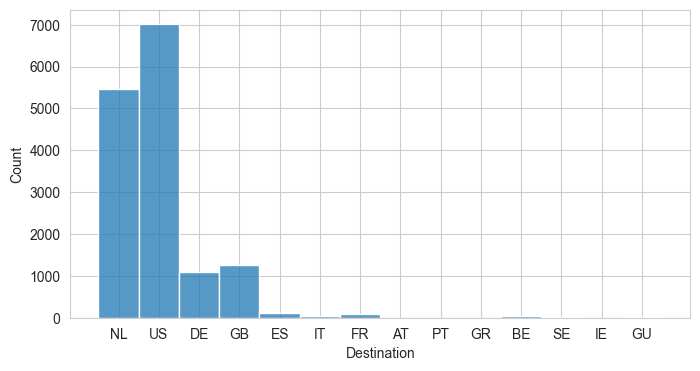

In [77]:
# Plot the distribution before transformation
plt.figure(figsize=(8, 4))
sns.histplot(df_ml_tr['Destination'])


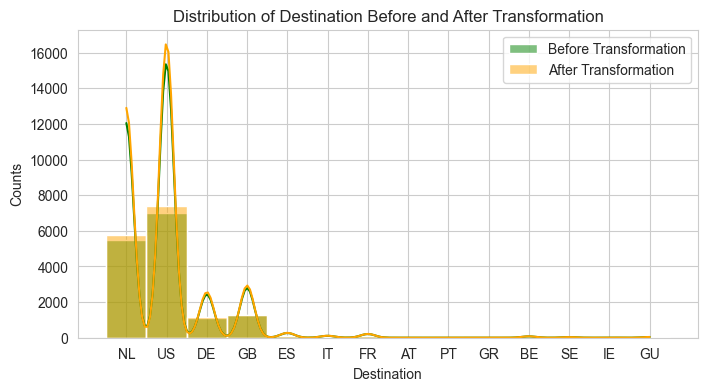

In [78]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Plot the distribution before transformation
plt.figure(figsize=(8, 4))
sns.histplot(df_ml_tr['Destination'], color='green', bins=30, kde=True, label='Before Transformation')

# Plot the distribution after transformation
sns.histplot(df_test_predict_destination['Destination'], color='orange', bins=30, kde=True, label='After Transformation')

# Add labels and title
plt.xlabel('Destination')
plt.ylabel('Counts')
plt.title('Distribution of Destination Before and After Transformation')
plt.legend()

# Show plot
plt.show()

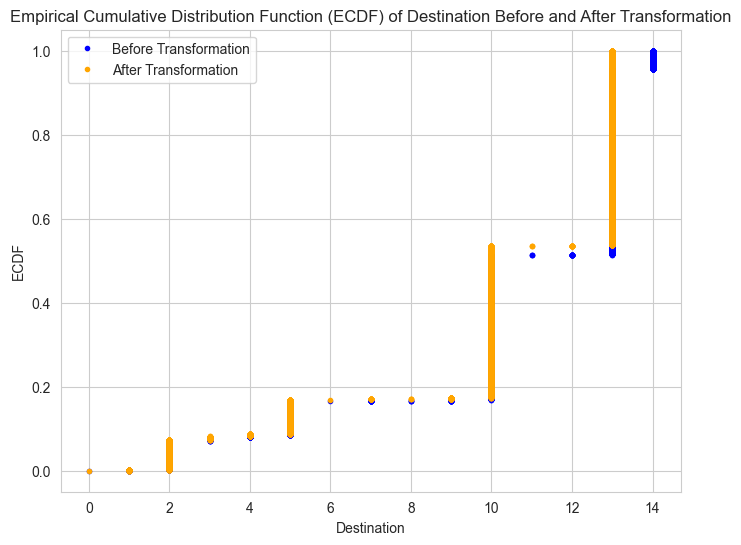

In [79]:
df_ml_tr_ecdf = df_ml_tr.copy()
df_test_predict_destination_ecdf = df_test_predict_destination.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the copied DataFrames
df_ml_tr_ecdf['Destination'] = label_encoder.fit_transform(df_ml_tr_ecdf['Destination'])
df_test_predict_destination_ecdf['Destination'] = label_encoder.transform(df_test_predict_destination_ecdf['Destination'])

# Function to calculate ECDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Calculate ECDF for 'Destination' before and after transformation
x_before, y_before = ecdf(df_ml_tr_ecdf['Destination'])
x_after, y_after = ecdf(df_test_predict_destination_ecdf['Destination'])

# Plot ECDF
plt.figure(figsize=(8, 6))
plt.plot(x_before, y_before, marker='.', linestyle='none', color='blue', label='Before Transformation')
plt.plot(x_after, y_after, marker='.', linestyle='none', color='orange', label='After Transformation')

# Add labels and title
plt.xlabel('Destination')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Destination Before and After Transformation')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [80]:
df_test_predict_destination[df_test_predict_destination['Logistic Partner']==0]

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group


In [81]:
df_ml_tr = df_test_predict_destination.copy()
df_ml_tr.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination           0
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner    259
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

#### Analysing and treating Logistic Partner Column

In [82]:
df_ml_tr['Logistic Partner'].value_counts()

Logistic Partner
C6     5410
C2     4262
C7     2364
C13    1416
C8     1003
C11     412
C12     281
C3      167
C4      160
C10      74
C9       59
C1       19
C5        4
Name: count, dtype: int64

In [83]:
logistic_partner_zero_entries = df_ml_tr[df_ml_tr['Logistic Partner'] == 0]
logistic_partner_zero_entries

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group


In [84]:
df_ml_tr['Logistic Partner'].isnull().sum()

259

In [85]:
### Define the function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for correlation between 'Logistic Partner' and each column
cramers_v_scores = {}
for column in df_ml_tr.columns:
    if column != 'Logistic Partner':  # Skip correlation with 'Logistic Partner' itself
        if column not in ['Date', 'Planned Date', 'Delivered Date']:  # Exclude date columns
            cramers_v_score = cramers_v(df_ml_tr['Logistic Partner'], df_ml_tr[column])
            cramers_v_scores[column] = cramers_v_score

# Sort the dictionary by Cramér's V score in descending order
sorted_scores = sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted columns and their Cramér's V scores
for column, score in sorted_scores:
    print(f"Cramér's V for correlation between 'Logistic Partner' and '{column}':", score)


Cramér's V for correlation between 'Logistic Partner' and 'ID_Record': nan
Cramér's V for correlation between 'Logistic Partner' and 'Deposit': 1.0
Cramér's V for correlation between 'Logistic Partner' and 'Market Demand': 0.726140139542241
Cramér's V for correlation between 'Logistic Partner' and 'Replacement': 0.5965013229875279
Cramér's V for correlation between 'Logistic Partner' and 'ID': 0.533522049542118
Cramér's V for correlation between 'Logistic Partner' and 'TYPE': 0.53115791120713
Cramér's V for correlation between 'Logistic Partner' and 'Entry ID': 0.49590911780409114
Cramér's V for correlation between 'Logistic Partner' and 'Strategic Sale': 0.46985808839013493
Cramér's V for correlation between 'Logistic Partner' and 'Strateg Prod': nan
Cramér's V for correlation between 'Logistic Partner' and 'Customer Group': 0.5513587423064384
Cramér's V for correlation between 'Logistic Partner' and 'Strat Customer': 0.3920840251532959
Cramér's V for correlation between 'Logistic Par

In [86]:
# Select the top 5 correlated columns
top_correlations_Logistic_Partner = sorted_scores[:7]

# Print the top 5 correlated columns and their Cramér's V scores
for column, score in top_correlations_Logistic_Partner:
    print(f"Cramér's V for correlation between 'Logistic Partner' and '{column}':", score)

Cramér's V for correlation between 'Logistic Partner' and 'ID_Record': nan
Cramér's V for correlation between 'Logistic Partner' and 'Deposit': 1.0
Cramér's V for correlation between 'Logistic Partner' and 'Market Demand': 0.726140139542241
Cramér's V for correlation between 'Logistic Partner' and 'Replacement': 0.5965013229875279
Cramér's V for correlation between 'Logistic Partner' and 'ID': 0.533522049542118
Cramér's V for correlation between 'Logistic Partner' and 'TYPE': 0.53115791120713
Cramér's V for correlation between 'Logistic Partner' and 'Entry ID': 0.49590911780409114


In [87]:
df_Logistic_Partner = df_ml_tr.copy()

# Check for NaN values in features
features = ['Deposit', 'Market Demand', 'Replacement', 'ID', 'TYPE', 'Entry ID']
print("NaN values in the features:")
print(df_Logistic_Partner[features].isnull().sum())

# Check for NaN values in the target variable
print("NaN values in the target variable (Logistic Partner):")
print(df_Logistic_Partner['Logistic Partner'].isnull().sum())

# Drop rows with NaN values in both features and the target variable
df_no_nan = df_Logistic_Partner.dropna(subset=features + ['Logistic Partner'])

# Define the features and target variable
X = df_no_nan[features]
y = df_no_nan['Logistic Partner']

# Define preprocessing steps
numerical_features = ['Market Demand', 'ID', 'Entry ID']
categorical_features = ['Replacement', 'Deposit', 'TYPE']

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),  # Handle numerical features
        ('cat', categorical_transformer, categorical_features)  # Handle categorical features
    ])

# Define the model
model = RandomForestClassifier()

# Create and fit the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict missing values only for rows where 'Logistic Partner' is missing
missing_partner_rows = df_Logistic_Partner['Logistic Partner'].isnull()
X_missing_partner = df_Logistic_Partner.loc[missing_partner_rows, features]
predicted_Logistic_Partner = pipeline.predict(X_missing_partner)

# Impute missing values in the original DataFrame
df_Logistic_Partner.loc[missing_partner_rows, 'Logistic Partner'] = predicted_Logistic_Partner

# Check if there are still NaN values in the target variable
print("NaN values in the target variable (Logistic Partner) after imputation:")
print(df_Logistic_Partner['Logistic Partner'].isnull().sum())

NaN values in the features:
Deposit          259
Market Demand      0
Replacement        0
ID                 0
TYPE               0
Entry ID           0
dtype: int64
NaN values in the target variable (Logistic Partner):
259
NaN values in the target variable (Logistic Partner) after imputation:
0


In [88]:
# Generate predictions for the prediction set
pred_y = pipeline.predict(X)  # Assuming X is the feature matrix for the prediction set

# Define the actual target values for the prediction set
y_true = df_Logistic_Partner['Logistic Partner'].loc[X.index]

# Calculate accuracy
accuracy = accuracy_score(y_true, pred_y)

# Calculate precision
precision = precision_score(y_true, pred_y, average='weighted')

# Calculate recall
recall = recall_score(y_true, pred_y, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, pred_y, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, pred_y)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
Confusion Matrix:
[[  19    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   74    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  412    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  281    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 1416    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 4262    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  167    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  160    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    4    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 5410    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 2364    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0   59]]


In [89]:
df_Logistic_Partner.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination           0
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner      0
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

In [90]:
# Perform the KS test
ks_statistic, p_value = ks_2samp(df_ml_tr['Logistic Partner'].dropna(), df_Logistic_Partner['Logistic Partner'])

# Choose significance level (alpha)
alpha = 0.05

# Compare KS statistic with critical value
if p_value < alpha:
    print("Reject the null hypothesis: The two samples come from different distributions.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to claim that the distributions are different.")

# Print the KS statistic and p-value
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

Fail to reject the null hypothesis: There is not enough evidence to claim that the distributions are different.
KS Statistic: 0.007085631540395987
P-value: 0.8209925349311938


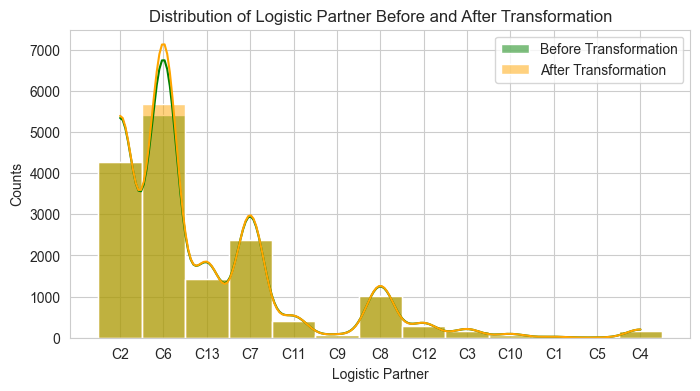

In [91]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Plot the distribution before transformation
plt.figure(figsize=(8, 4))
sns.histplot(df_ml_tr['Logistic Partner'], color='green', bins=30, kde=True, label='Before Transformation')

# Plot the distribution after transformation
sns.histplot(df_Logistic_Partner['Logistic Partner'], color='orange', bins=30, kde=True, label='After Transformation')

# Add labels and title
plt.xlabel('Logistic Partner')
plt.ylabel('Counts')
plt.title('Distribution of Logistic Partner Before and After Transformation')
plt.legend()

# Show plot
plt.show()

In [92]:
df_ml_tr = df_Logistic_Partner.copy()
df_ml_tr.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination           0
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner      0
Deposit             259
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

#### Analysing and treating Deposit Column

In [93]:
df_ml_tr['Deposit'].value_counts()

Deposit
L9     5410
L2     4262
L8     2364
L13    1416
L30    1003
L11     412
L12     281
L3      167
L5      160
L10      74
L50      59
L1       19
L6        4
Name: count, dtype: int64

In [94]:
df_ml_tr['Deposit'].isnull().sum()

259

In [95]:
### Define the function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for correlation between 'Logistic Partner' and each column
cramers_v_scores = {}
for column in df_ml_tr.columns:
    if column != 'Deposit':  # Skip correlation with 'Deposit' itself
        if column not in ['Date', 'Planned Date', 'Delivered Date']:  # Exclude date columns
            cramers_v_score = cramers_v(df_ml_tr['Deposit'], df_ml_tr[column])
            cramers_v_scores[column] = cramers_v_score

# Sort the dictionary by Cramér's V score in descending order
sorted_scores = sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted columns and their Cramér's V scores
for column, score in sorted_scores:
    print(f"Cramér's V for correlation between 'Logistic Partner' and '{column}':", score)


Cramér's V for correlation between 'Logistic Partner' and 'ID_Record': nan
Cramér's V for correlation between 'Logistic Partner' and 'Logistic Partner': 1.0
Cramér's V for correlation between 'Logistic Partner' and 'Market Demand': 0.726140139542241
Cramér's V for correlation between 'Logistic Partner' and 'Replacement': 0.5965013229875279
Cramér's V for correlation between 'Logistic Partner' and 'ID': 0.533522049542118
Cramér's V for correlation between 'Logistic Partner' and 'TYPE': 0.5311579112071299
Cramér's V for correlation between 'Logistic Partner' and 'Entry ID': 0.49590911780409114
Cramér's V for correlation between 'Logistic Partner' and 'Strategic Sale': 0.46985808839013493
Cramér's V for correlation between 'Logistic Partner' and 'Strateg Prod': nan
Cramér's V for correlation between 'Logistic Partner' and 'Customer Group': 0.5513587423064384
Cramér's V for correlation between 'Logistic Partner' and 'Strat Customer': 0.3920840251532959
Cramér's V for correlation between 'L

In [96]:
# Select the top 5 correlated columns
top_correlations_Deposit = sorted_scores[:7]

# Print the top 5 correlated columns and their Cramér's V scores
for column, score in top_correlations_Deposit:
    print(f"Cramér's V for correlation between 'Deposit' and '{column}':", score)

Cramér's V for correlation between 'Deposit' and 'ID_Record': nan
Cramér's V for correlation between 'Deposit' and 'Logistic Partner': 1.0
Cramér's V for correlation between 'Deposit' and 'Market Demand': 0.726140139542241
Cramér's V for correlation between 'Deposit' and 'Replacement': 0.5965013229875279
Cramér's V for correlation between 'Deposit' and 'ID': 0.533522049542118
Cramér's V for correlation between 'Deposit' and 'TYPE': 0.5311579112071299
Cramér's V for correlation between 'Deposit' and 'Entry ID': 0.49590911780409114


In [97]:
df_Deposit = df_ml_tr.copy()

# Check for NaN values in features
features = ['Logistic Partner', 'Market Demand', 'Replacement', 'ID', 'TYPE', 'Entry ID']
print("NaN values in the features:")
print(df_Deposit[features].isnull().sum())

# Check for NaN values in the target variable
print("NaN values in the target variable (Deposit):")
print(df_Deposit['Deposit'].isnull().sum())

# Drop rows with NaN values in both features and the target variable
df_no_nan = df_Deposit.dropna(subset=features + ['Deposit'])

# Define the features and target variable
X = df_no_nan[features]
y = df_no_nan['Deposit']

# Define preprocessing steps
numerical_features = ['Market Demand', 'ID', 'Entry ID']
categorical_features = ['Replacement', 'Logistic Partner', 'TYPE']

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),  # Handle numerical features
        ('cat', categorical_transformer, categorical_features)  # Handle categorical features
    ])

# Define the model
model = RandomForestClassifier()

# Create and fit the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict missing values only for rows where 'Deposit' is missing
missing_deposit_rows = df_Deposit['Deposit'].isnull()
X_missing_deposit = df_Deposit.loc[missing_deposit_rows, features]
predicted_Deposit = pipeline.predict(X_missing_deposit)

# Impute missing values in the original DataFrame
df_Deposit.loc[missing_deposit_rows, 'Deposit'] = predicted_Deposit

# Check if there are still NaN values in the target variable
print("NaN values in the target variable (Deposit) after imputation:")
print(df_Deposit['Deposit'].isnull().sum())

NaN values in the features:
Logistic Partner    0
Market Demand       0
Replacement         0
ID                  0
TYPE                0
Entry ID            0
dtype: int64
NaN values in the target variable (Deposit):
259
NaN values in the target variable (Deposit) after imputation:
0


In [98]:
# Generate predictions for the prediction set
pred_y = pipeline.predict(X)  # Assuming X is the feature matrix for the prediction set

# Define the actual target values for the prediction set
y_true = df_Logistic_Partner['Deposit'].loc[X.index]

# Calculate accuracy
accuracy = accuracy_score(y_true, pred_y)

# Calculate precision
precision = precision_score(y_true, pred_y, average='weighted')

# Calculate recall
recall = recall_score(y_true, pred_y, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, pred_y, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, pred_y)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
Confusion Matrix:
[[  19    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   74    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  412    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  281    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 1416    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 4262    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  167    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1003    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  160    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   59    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    4    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 2364    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0 5410]]


In [99]:
# Perform the KS test
ks_statistic, p_value = ks_2samp(df_ml_tr['Deposit'].dropna(), df_Deposit['Deposit'])

# Choose significance level (alpha)
alpha = 0.05

# Compare KS statistic with critical value
if p_value < alpha:
    print("Reject the null hypothesis: The two samples come from different distributions.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to claim that the distributions are different.")

# Print the KS statistic and p-value
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

Fail to reject the null hypothesis: There is not enough evidence to claim that the distributions are different.
KS Statistic: 0.010658166294979732
P-value: 0.32995666242384347


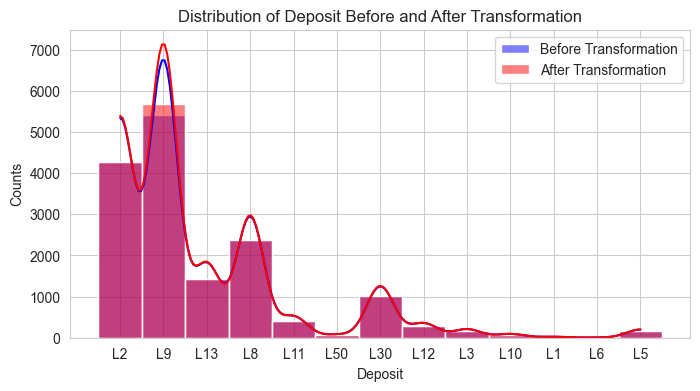

In [100]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Plot the distribution before transformation
plt.figure(figsize=(8, 4))
sns.histplot(df_ml_tr['Deposit'], color='blue', bins=30, kde=True, label='Before Transformation')

# Plot the distribution after transformation
sns.histplot(df_Deposit['Deposit'], color='red', bins=30, kde=True, label='After Transformation')

# Add labels and title
plt.xlabel('Deposit')
plt.ylabel('Counts')
plt.title('Distribution of Deposit Before and After Transformation')
plt.legend()

# Show plot
plt.show()

In [101]:
df_Deposit.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination           0
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner      0
Deposit               0
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

In [102]:
df_Deposit['Deposit'].value_counts()

Deposit
L9     5669
L2     4262
L8     2364
L13    1416
L30    1003
L11     412
L12     281
L3      167
L5      160
L10      74
L50      59
L1       19
L6        4
Name: count, dtype: int64

In [103]:
df_ml_tr = df_Deposit.copy()

#### Analysing and treating Delivered Date Column

In [104]:
df_predict_delivered_date = df_ml_tr.copy()

In [105]:
df_predict_delivered_date[df_predict_delivered_date['Delivered Date'].isnull()]

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
156,157,75,19357,1,US,7,2022-09-18,20,4476,361,3017.96,8.36,2024-04-08,NaT,SALE,361.0,Channel2,C6,L9,NO,1,2022Q4,3,0,Yes,C,200
832,833,66,19610,0,NL,2,2022-12-18,17,4471,3,16.83,5.61,2024-02-14,NaT,SALE,3.0,Channel2,C6,L9,NO,3,2022Q3,3,0,No,B,3986
1346,1347,66,19633,0,NL,2,2022-01-01,36,4471,1,5.61,5.61,2024-02-14,NaT,SALE,1.0,Channel2,C6,L9,NO,3,2022Q3,5,0,No,B,3986
3130,3131,66,19736,0,GB,2,2022-02-15,3,4440,150,1071.00,7.14,2024-02-14,NaT,SALE,150.0,Channel2,C6,L9,NO,3,2022Q3,11,0,No,C,3986
4956,4957,66,19829,0,GB,2,2022-03-28,24,4464,30,161.70,5.39,2024-05-23,NaT,SALE,30.0,Channel2,C6,L9,NO,3,2022Q2,12,0,No,A,3986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793,15794,17,20374,1,US,2,2022-12-31,2,4479,2,28.34,14.17,2023-12-31,NaT,SALE,2.0,Channel2,C6,L9,NO,1,2022Q3,5,0,No,C,684
15794,15795,17,20374,1,US,16,2022-12-31,5,4492,1,3.43,3.43,2023-12-31,NaT,SALE,1.0,Channel2,C2,L2,NO,1,2022Q3,5,0,No,C,684
15795,15796,17,20374,1,US,7,2022-12-31,4,4461,250,60.00,0.24,2023-12-31,NaT,SALE,250.0,Channel2,C2,L2,NO,1,2022Q3,5,0,No,C,684
15796,15797,66,20374,0,GB,21,2022-12-31,6,4461,8,1.92,0.24,2023-12-31,NaT,SALE,8.0,Channel2,C6,L9,NO,3,2022Q3,5,0,No,C,3986


##### Using Linear Regression

In [106]:
df_predict_delivered_date

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,1,57,17592,1,US,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,NO,2,2022Q3,4,0,YES,C,176
1,2,57,17899,1,IT,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,NO,2,2022Q3,9,0,YES,C,176
2,3,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,YES,1,2022Q3,1,0,No,B,684
15886,15887,17,19580,1,US,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,B,684
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,A,684
15888,15889,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,A,684


In [107]:
# Splitting the Quarter column into 'Year' and 'Quarter' columns
df_predict_delivered_date[['Year', 'Quarter']] = df_predict_delivered_date['Quarter'].str.split('Q', expand=True)

# Dropping the 'Q' from the Quarter column
df_predict_delivered_date['Quarter'] = df_predict_delivered_date['Quarter'].astype(int)

# Converting 'Year' to int
df_predict_delivered_date['Year'] = df_predict_delivered_date['Year'].astype(int)
df_predict_delivered_date


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year
0,1,57,17592,1,US,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,NO,2,3,4,0,YES,C,176,2022
1,2,57,17899,1,IT,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,NO,2,3,9,0,YES,C,176,2022
2,3,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,NO,3,4,1,0,No,C,3986,2022
3,4,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,NO,1,3,9,0,No,C,684,2022
4,5,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,NO,3,4,12,0,No,C,521,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,YES,1,3,1,0,No,B,684,2022
15886,15887,17,19580,1,US,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,NO,1,3,1,0,No,B,684,2022
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,3,1,0,No,A,684,2022
15888,15889,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,3,1,0,No,A,684,2022


In [108]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Replacement' column
df_predict_delivered_date['Replacement'] = label_encoder.fit_transform(df_predict_delivered_date['Replacement'])
df_predict_delivered_date


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year
0,1,57,17592,1,US,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,0,2,3,4,0,YES,C,176,2022
1,2,57,17899,1,IT,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,0,2,3,9,0,YES,C,176,2022
2,3,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,0,3,4,1,0,No,C,3986,2022
3,4,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,0,1,3,9,0,No,C,684,2022
4,5,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,0,3,4,12,0,No,C,521,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,1,1,3,1,0,No,B,684,2022
15886,15887,17,19580,1,US,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,0,1,3,1,0,No,B,684,2022
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,0,1,3,1,0,No,A,684,2022
15888,15889,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,0,1,3,1,0,No,A,684,2022


In [109]:
# Filter for rows where the "Delivered Date" column has missing values (NaN)
df_predict_delivered_date[df_predict_delivered_date['Delivered Date'].isnull()]


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year
156,157,75,19357,1,US,7,2022-09-18,20,4476,361,3017.96,8.36,2024-04-08,NaT,SALE,361.0,Channel2,C6,L9,0,1,4,3,0,Yes,C,200,2022
832,833,66,19610,0,NL,2,2022-12-18,17,4471,3,16.83,5.61,2024-02-14,NaT,SALE,3.0,Channel2,C6,L9,0,3,3,3,0,No,B,3986,2022
1346,1347,66,19633,0,NL,2,2022-01-01,36,4471,1,5.61,5.61,2024-02-14,NaT,SALE,1.0,Channel2,C6,L9,0,3,3,5,0,No,B,3986,2022
3130,3131,66,19736,0,GB,2,2022-02-15,3,4440,150,1071.00,7.14,2024-02-14,NaT,SALE,150.0,Channel2,C6,L9,0,3,3,11,0,No,C,3986,2022
4956,4957,66,19829,0,GB,2,2022-03-28,24,4464,30,161.70,5.39,2024-05-23,NaT,SALE,30.0,Channel2,C6,L9,0,3,2,12,0,No,A,3986,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793,15794,17,20374,1,US,2,2022-12-31,2,4479,2,28.34,14.17,2023-12-31,NaT,SALE,2.0,Channel2,C6,L9,0,1,3,5,0,No,C,684,2022
15794,15795,17,20374,1,US,16,2022-12-31,5,4492,1,3.43,3.43,2023-12-31,NaT,SALE,1.0,Channel2,C2,L2,0,1,3,5,0,No,C,684,2022
15795,15796,17,20374,1,US,7,2022-12-31,4,4461,250,60.00,0.24,2023-12-31,NaT,SALE,250.0,Channel2,C2,L2,0,1,3,5,0,No,C,684,2022
15796,15797,66,20374,0,GB,21,2022-12-31,6,4461,8,1.92,0.24,2023-12-31,NaT,SALE,8.0,Channel2,C6,L9,0,3,3,5,0,No,C,3986,2022


In [110]:
# Define the function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for correlation between 'Delivered Date' and each column
cramers_v_scores = {}
for column in df_predict_delivered_date.columns:
    if column != 'Delivered Date':  # Skip correlation with itself
        cramers_v_score = cramers_v(df_predict_delivered_date['Delivered Date'], df_predict_delivered_date[column])
        cramers_v_scores[column] = cramers_v_score

# Sort the dictionary by Cramér's V score in descending order
sorted_scores = sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted columns and their Cramér's V scores
for column, score in sorted_scores:
    print(f"Cramér's V for correlation between 'Delivered Date' and '{column}':", score)

    

Cramér's V for correlation between 'Delivered Date' and 'ID_Record': inf
Cramér's V for correlation between 'Delivered Date' and 'Quarter': 0.8378855251128858
Cramér's V for correlation between 'Delivered Date' and 'Replacement': 0.6417842559444876
Cramér's V for correlation between 'Delivered Date' and 'Week': 0.5169834533696311
Cramér's V for correlation between 'Delivered Date' and 'Strategic Sale': 0.5107310361628434
Cramér's V for correlation between 'Delivered Date' and 'Market Demand': 0.4689843002315184
Cramér's V for correlation between 'Delivered Date' and 'ID': 0.4416574394626873
Cramér's V for correlation between 'Delivered Date' and 'Logistic Partner': 0.43589210637601333
Cramér's V for correlation between 'Delivered Date' and 'Deposit': 0.43589210637601333
Cramér's V for correlation between 'Delivered Date' and 'Entry ID': 0.43425716106416273
Cramér's V for correlation between 'Delivered Date' and 'TYPE': 0.4258004705798559
Cramér's V for correlation between 'Delivered Da

In [111]:
# Select the top 5 correlated columns
top_correlations = sorted_scores[:6]

# Print the top 5 correlated columns and their Cramér's V scores
for column, score in top_correlations:
    print(f"Cramér's V for correlation between 'Delivered Date' and '{column}':", score)

Cramér's V for correlation between 'Delivered Date' and 'ID_Record': inf
Cramér's V for correlation between 'Delivered Date' and 'Quarter': 0.8378855251128858
Cramér's V for correlation between 'Delivered Date' and 'Replacement': 0.6417842559444876
Cramér's V for correlation between 'Delivered Date' and 'Week': 0.5169834533696311
Cramér's V for correlation between 'Delivered Date' and 'Strategic Sale': 0.5107310361628434
Cramér's V for correlation between 'Delivered Date' and 'Market Demand': 0.4689843002315184


In [112]:
df_predict_delivered_date_LR = df_predict_delivered_date.copy()
df_predict_delivered_date_LR.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination           0
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner      0
Deposit               0
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
Year                  0
dtype: int64

In [113]:
# Convert the column to datetime if it's not already
df_predict_delivered_date_LR['Delivered Date'] = pd.to_datetime(df_predict_delivered_date_LR['Delivered Date'])

# Assuming 'Delivered Date' is already in datetime format
df_predict_delivered_date_LR['Delivered Date'] = df_predict_delivered_date_LR['Delivered Date'].dt.normalize()

# Check the data types again
print(df_predict_delivered_date_LR.dtypes)


ID_Record                    int64
ID                           int64
Entry ID                     int64
Strategic Sale               int64
Destination                 object
Group                        int64
Date                datetime64[ns]
Sequence                     int64
Product                      int64
Qty                          int64
Total Value                float64
Unit Price                 float64
Planned Date        datetime64[ns]
Delivered Date      datetime64[ns]
TYPE                        object
Qty Delivered              float64
Order Source                object
Logistic Partner            object
Deposit                     object
Replacement                  int64
Market Demand                int64
Quarter                      int64
Week                         int64
Strateg Prod                 int64
Strat Customer              object
ABC                       category
Customer Group               int64
Year                         int64
dtype: object


In [114]:
missing_values_df = df_predict_delivered_date_LR[df_predict_delivered_date_LR['Delivered Date'].isnull()]
missing_values_df

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year
156,157,75,19357,1,US,7,2022-09-18,20,4476,361,3017.96,8.36,2024-04-08,NaT,SALE,361.0,Channel2,C6,L9,0,1,4,3,0,Yes,C,200,2022
832,833,66,19610,0,NL,2,2022-12-18,17,4471,3,16.83,5.61,2024-02-14,NaT,SALE,3.0,Channel2,C6,L9,0,3,3,3,0,No,B,3986,2022
1346,1347,66,19633,0,NL,2,2022-01-01,36,4471,1,5.61,5.61,2024-02-14,NaT,SALE,1.0,Channel2,C6,L9,0,3,3,5,0,No,B,3986,2022
3130,3131,66,19736,0,GB,2,2022-02-15,3,4440,150,1071.00,7.14,2024-02-14,NaT,SALE,150.0,Channel2,C6,L9,0,3,3,11,0,No,C,3986,2022
4956,4957,66,19829,0,GB,2,2022-03-28,24,4464,30,161.70,5.39,2024-05-23,NaT,SALE,30.0,Channel2,C6,L9,0,3,2,12,0,No,A,3986,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793,15794,17,20374,1,US,2,2022-12-31,2,4479,2,28.34,14.17,2023-12-31,NaT,SALE,2.0,Channel2,C6,L9,0,1,3,5,0,No,C,684,2022
15794,15795,17,20374,1,US,16,2022-12-31,5,4492,1,3.43,3.43,2023-12-31,NaT,SALE,1.0,Channel2,C2,L2,0,1,3,5,0,No,C,684,2022
15795,15796,17,20374,1,US,7,2022-12-31,4,4461,250,60.00,0.24,2023-12-31,NaT,SALE,250.0,Channel2,C2,L2,0,1,3,5,0,No,C,684,2022
15796,15797,66,20374,0,GB,21,2022-12-31,6,4461,8,1.92,0.24,2023-12-31,NaT,SALE,8.0,Channel2,C6,L9,0,3,3,5,0,No,C,3986,2022


In [115]:
# Extract year, month, and day into separate columns
df_predict_delivered_date_LR['Delivered Date_Year'] = df_predict_delivered_date_LR['Delivered Date'].dt.year
df_predict_delivered_date_LR['Delivered Date_Month'] = df_predict_delivered_date_LR['Delivered Date'].dt.month
df_predict_delivered_date_LR['Delivered Date_Day'] = df_predict_delivered_date_LR['Delivered Date'].dt.day

df_predict_delivered_date_LR[df_predict_delivered_date_LR['Delivered Date'].isnull()]


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year,Delivered Date_Year,Delivered Date_Month,Delivered Date_Day
156,157,75,19357,1,US,7,2022-09-18,20,4476,361,3017.96,8.36,2024-04-08,NaT,SALE,361.0,Channel2,C6,L9,0,1,4,3,0,Yes,C,200,2022,NaN,NaN,NaN
832,833,66,19610,0,NL,2,2022-12-18,17,4471,3,16.83,5.61,2024-02-14,NaT,SALE,3.0,Channel2,C6,L9,0,3,3,3,0,No,B,3986,2022,NaN,NaN,NaN
1346,1347,66,19633,0,NL,2,2022-01-01,36,4471,1,5.61,5.61,2024-02-14,NaT,SALE,1.0,Channel2,C6,L9,0,3,3,5,0,No,B,3986,2022,NaN,NaN,NaN
3130,3131,66,19736,0,GB,2,2022-02-15,3,4440,150,1071.00,7.14,2024-02-14,NaT,SALE,150.0,Channel2,C6,L9,0,3,3,11,0,No,C,3986,2022,NaN,NaN,NaN
4956,4957,66,19829,0,GB,2,2022-03-28,24,4464,30,161.70,5.39,2024-05-23,NaT,SALE,30.0,Channel2,C6,L9,0,3,2,12,0,No,A,3986,2022,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793,15794,17,20374,1,US,2,2022-12-31,2,4479,2,28.34,14.17,2023-12-31,NaT,SALE,2.0,Channel2,C6,L9,0,1,3,5,0,No,C,684,2022,NaN,NaN,NaN
15794,15795,17,20374,1,US,16,2022-12-31,5,4492,1,3.43,3.43,2023-12-31,NaT,SALE,1.0,Channel2,C2,L2,0,1,3,5,0,No,C,684,2022,NaN,NaN,NaN
15795,15796,17,20374,1,US,7,2022-12-31,4,4461,250,60.00,0.24,2023-12-31,NaT,SALE,250.0,Channel2,C2,L2,0,1,3,5,0,No,C,684,2022,NaN,NaN,NaN
15796,15797,66,20374,0,GB,21,2022-12-31,6,4461,8,1.92,0.24,2023-12-31,NaT,SALE,8.0,Channel2,C6,L9,0,3,3,5,0,No,C,3986,2022,NaN,NaN,NaN


In [116]:
df_predict_delivered_date_LR.isnull().sum()

ID_Record                 0
ID                        0
Entry ID                  0
Strategic Sale            0
Destination               0
Group                     0
Date                      0
Sequence                  0
Product                   0
Qty                       0
Total Value               0
Unit Price                0
Planned Date              0
Delivered Date          319
TYPE                      0
Qty Delivered             0
Order Source              0
Logistic Partner          0
Deposit                   0
Replacement               0
Market Demand             0
Quarter                   0
Week                      0
Strateg Prod              0
Strat Customer            0
ABC                       0
Customer Group            0
Year                      0
Delivered Date_Year     319
Delivered Date_Month    319
Delivered Date_Day      319
dtype: int64

In [117]:
# Split the data into training and prediction sets
train_data = df_predict_delivered_date_LR.dropna(subset=['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'])
prediction_data = df_predict_delivered_date_LR[df_predict_delivered_date_LR[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']].isnull().any(axis=1)]

# Train and fill 'Delivered Date_Year'
X_train_year = train_data[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_year = train_data['Delivered Date_Year']
linear_reg_model_year = LinearRegression()
linear_reg_model_year.fit(X_train_year, y_train_year)
predicted_year = linear_reg_model_year.predict(prediction_data[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']])
prediction_data.loc[:, 'Delivered Date_Year'] = predicted_year

# Train and fill 'Delivered Date_Month'
X_train_month = train_data[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_month = train_data['Delivered Date_Month']
linear_reg_model_month = LinearRegression()
linear_reg_model_month.fit(X_train_month, y_train_month)
predicted_month = linear_reg_model_month.predict(prediction_data[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']])
prediction_data.loc[:, 'Delivered Date_Month'] = predicted_month

# Train and fill 'Delivered Date_Day'
X_train_day = train_data[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_day = train_data['Delivered Date_Day']
linear_reg_model_day = LinearRegression()
linear_reg_model_day.fit(X_train_day, y_train_day)
predicted_day = linear_reg_model_day.predict(prediction_data[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']])
prediction_data.loc[:, 'Delivered Date_Day'] = predicted_day

# Combine the filled prediction set with the original data
df_predict_delivered_date_filled_LR = pd.concat([train_data, prediction_data], axis=0)

# Check for any remaining missing values
print("Missing values in 'Delivered Date' after filling:\n",df_predict_delivered_date_filled_LR[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']].isnull().sum())


Missing values in 'Delivered Date' after filling:
 Delivered Date_Year     0
Delivered Date_Month    0
Delivered Date_Day      0
dtype: int64


In [118]:
# Calculate Root Mean Squared Error (RMSE) for Delivered Date_Year
rmse_year = np.sqrt(mean_squared_error(train_data['Delivered Date_Year'], linear_reg_model_year.predict(X_train_year)))
print("Root Mean Squared Error (Delivered Date_Year):", rmse_year)

# Calculate Root Mean Squared Error (RMSE) for Delivered Date_Month
rmse_month = np.sqrt(mean_squared_error(train_data['Delivered Date_Month'], linear_reg_model_month.predict(X_train_month)))
print("Root Mean Squared Error (Delivered Date_Month):", rmse_month)

# Calculate Root Mean Squared Error (RMSE) for Delivered Date_Day
rmse_day = np.sqrt(mean_squared_error(train_data['Delivered Date_Day'], linear_reg_model_day.predict(X_train_day)))
print("Root Mean Squared Error (Delivered Date_Day):", rmse_day)

Root Mean Squared Error (Delivered Date_Year): 0.15603889032404436
Root Mean Squared Error (Delivered Date_Month): 2.931271393964308
Root Mean Squared Error (Delivered Date_Day): 8.139121546656508


#### Interpretation:

==> In general, lower RMSE values indicate better predictive performance

Delivered Date_Year: The RMSE is relatively low (0.1560), indicating that the model's predictions for the year component of the delivered date are quite accurate.

Delivered Date_Month: The RMSE is higher (2.9313), suggesting that the model's predictions for the month component have more variability and are less accurate compared to the year component.

Delivered Date_Day: The RMSE is even higher (8.1391), indicating that the model's predictions for the day component have the most variability and are the least accurate among the three components.

In [119]:
df_predict_delivered_date_filled_LR.isnull().sum()

ID_Record                 0
ID                        0
Entry ID                  0
Strategic Sale            0
Destination               0
Group                     0
Date                      0
Sequence                  0
Product                   0
Qty                       0
Total Value               0
Unit Price                0
Planned Date              0
Delivered Date          319
TYPE                      0
Qty Delivered             0
Order Source              0
Logistic Partner          0
Deposit                   0
Replacement               0
Market Demand             0
Quarter                   0
Week                      0
Strateg Prod              0
Strat Customer            0
ABC                       0
Customer Group            0
Year                      0
Delivered Date_Year       0
Delivered Date_Month      0
Delivered Date_Day        0
dtype: int64

##### Using Decision Trees

In [120]:
df_predict_delivered_date_DT = df_predict_delivered_date.copy()

In [121]:
# Extract year, month, and day into separate columns
df_predict_delivered_date_DT['Delivered Date_Year'] = df_predict_delivered_date_DT['Delivered Date'].dt.year
df_predict_delivered_date_DT['Delivered Date_Month'] = df_predict_delivered_date_DT['Delivered Date'].dt.month
df_predict_delivered_date_DT['Delivered Date_Day'] = df_predict_delivered_date_DT['Delivered Date'].dt.day

df_predict_delivered_date_DT.isnull().sum()


ID_Record                 0
ID                        0
Entry ID                  0
Strategic Sale            0
Destination               0
Group                     0
Date                      0
Sequence                  0
Product                   0
Qty                       0
Total Value               0
Unit Price                0
Planned Date              0
Delivered Date          319
TYPE                      0
Qty Delivered             0
Order Source              0
Logistic Partner          0
Deposit                   0
Replacement               0
Market Demand             0
Quarter                   0
Week                      0
Strateg Prod              0
Strat Customer            0
ABC                       0
Customer Group            0
Year                      0
Delivered Date_Year     319
Delivered Date_Month    319
Delivered Date_Day      319
dtype: int64

In [122]:
# Split the data into training and prediction sets
train_data_DT = df_predict_delivered_date_DT.dropna(subset=['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'])
prediction_data_DT = df_predict_delivered_date_DT[df_predict_delivered_date_DT[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']].isnull().any(axis=1)]

# Define features (X) and target variables (y) for training
X_train_DT = train_data_DT[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_DT = train_data_DT[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']]

# Train the Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_DT, y_train_DT)

# Predict delivery dates for the prediction set
X_pred_DT = prediction_data_DT[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
predicted_delivered_dates_DT = decision_tree_model.predict(X_pred_DT)

# Fill in missing values in the prediction set with the predicted values
prediction_data_DT[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']] = predicted_delivered_dates_DT

# Combine the filled prediction set with the original data
df_predict_delivered_date_filled_DT = pd.concat([train_data_DT, prediction_data_DT], axis=0)

# Check for any remaining missing values
print("Missing values in 'Delivered Date' after filling:")
print(df_predict_delivered_date_filled_DT[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']].isnull().sum())

# Calculate Mean Squared Error (MSE) for each target column
y_true_DT = train_data_DT[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']]
y_pred_DT = decision_tree_model.predict(X_train_DT)

mse_DT = ((y_true_DT - y_pred_DT)**2).mean()

# Separate the MSE into individual columns
mse_DT_year = mse_DT[0]
mse_DT_month = mse_DT[1]
mse_DT_day = mse_DT[2]

# Calculate Root Mean Squared Error (RMSE) for each target column
rmse_DT_year = np.sqrt(mse_DT_year)
rmse_DT_month = np.sqrt(mse_DT_month)
rmse_DT_day = np.sqrt(mse_DT_day)

print("Root Mean Squared Error (Delivered Date_Year):", rmse_DT_year)
print("Root Mean Squared Error (Delivered Date_Month):", rmse_DT_month)
print("Root Mean Squared Error (Delivered Date_Day):", rmse_DT_day)



Missing values in 'Delivered Date' after filling:
Delivered Date_Year     0
Delivered Date_Month    0
Delivered Date_Day      0
dtype: int64
Root Mean Squared Error (Delivered Date_Year): 0.12987104254061868
Root Mean Squared Error (Delivered Date_Month): 1.78906535682442
Root Mean Squared Error (Delivered Date_Day): 6.807050480253662


In [123]:
df_predict_delivered_date_filled_DT.isnull().sum()

ID_Record                 0
ID                        0
Entry ID                  0
Strategic Sale            0
Destination               0
Group                     0
Date                      0
Sequence                  0
Product                   0
Qty                       0
Total Value               0
Unit Price                0
Planned Date              0
Delivered Date          319
TYPE                      0
Qty Delivered             0
Order Source              0
Logistic Partner          0
Deposit                   0
Replacement               0
Market Demand             0
Quarter                   0
Week                      0
Strateg Prod              0
Strat Customer            0
ABC                       0
Customer Group            0
Year                      0
Delivered Date_Year       0
Delivered Date_Month      0
Delivered Date_Day        0
dtype: int64

#### Interpretation:

==> In general, lower RMSE values indicate better predictive performance.

Delivered Date_Year: The RMSE is relatively low (0.13), indicating that the model's predictions for the year component of the delivered date are quite accurate.

Delivered Date_Month: The RMSE is higher (1.79), suggesting that the model's predictions for the month component have more variability and are less accurate compared to the year component.

Delivered Date_Day: The RMSE is even higher (6.81), indicating that the model's predictions for the day component have the most variability and are the least accurate among the three components.


##### Using Random Forests

In [124]:
df_predict_delivered_date_RM = df_predict_delivered_date.copy()

In [125]:
# Extract year, month, and day into separate columns
df_predict_delivered_date_RM['Delivered Date_Year'] = df_predict_delivered_date_RM['Delivered Date'].dt.year
df_predict_delivered_date_RM['Delivered Date_Month'] = df_predict_delivered_date_RM['Delivered Date'].dt.month
df_predict_delivered_date_RM['Delivered Date_Day'] = df_predict_delivered_date_RM['Delivered Date'].dt.day

df_predict_delivered_date_RM.isnull().sum()


ID_Record                 0
ID                        0
Entry ID                  0
Strategic Sale            0
Destination               0
Group                     0
Date                      0
Sequence                  0
Product                   0
Qty                       0
Total Value               0
Unit Price                0
Planned Date              0
Delivered Date          319
TYPE                      0
Qty Delivered             0
Order Source              0
Logistic Partner          0
Deposit                   0
Replacement               0
Market Demand             0
Quarter                   0
Week                      0
Strateg Prod              0
Strat Customer            0
ABC                       0
Customer Group            0
Year                      0
Delivered Date_Year     319
Delivered Date_Month    319
Delivered Date_Day      319
dtype: int64

In [126]:
# Split the data into training and prediction sets
train_data_RM = df_predict_delivered_date_RM.dropna(subset=['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'])
prediction_data_RM = df_predict_delivered_date_RM[df_predict_delivered_date_RM[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']].isnull().any(axis=1)]

# Define features (X) and target variables (y) for training
X_train_RM = train_data_RM[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_RM = train_data_RM[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']]

# Train the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_RM, y_train_RM)

# Predict delivery dates for the prediction set
X_pred_RM = prediction_data_RM[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
predicted_delivered_dates_RM = random_forest_model.predict(X_pred_RM)

# Fill in missing values in the prediction set with the predicted values
prediction_data_RM[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']] = predicted_delivered_dates_RM

# Combine the filled prediction set with the original data
df_predict_delivered_date_filled_RM = pd.concat([train_data_RM, prediction_data_RM], axis=0)

# Check for any remaining missing values
print("Missing values in 'Delivered Date' after filling:")
print(df_predict_delivered_date_filled_RM[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']].isnull().sum())

# Calculate Mean Squared Error (MSE) for each target column
y_true_RM = train_data_RM[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']]
y_pred_RM = random_forest_model.predict(X_train_RM)

mse_RM_year, mse_RM_month, mse_RM_day = mean_squared_error(y_true_RM.iloc[:, 0], y_pred_RM.astype(int)[:, 0], squared=True), \
                                          mean_squared_error(y_true_RM.iloc[:, 1], y_pred_RM.astype(int)[:, 1], squared=True), \
                                          mean_squared_error(y_true_RM.iloc[:, 2], y_pred_RM.astype(int)[:, 2], squared=True)

# Calculate Root Mean Squared Error (RMSE) for each target column
rmse_RM_year = np.sqrt(mse_RM_year)
rmse_RM_month = np.sqrt(mse_RM_month)
rmse_RM_day = np.sqrt(mse_RM_day)

print("Root Mean Squared Error (Delivered Date_Year):", rmse_RM_year)
print("Root Mean Squared Error (Delivered Date_Month):", rmse_RM_month)
print("Root Mean Squared Error (Delivered Date_Day):", rmse_RM_day)


Missing values in 'Delivered Date' after filling:
Delivered Date_Year     0
Delivered Date_Month    0
Delivered Date_Day      0
dtype: int64
Root Mean Squared Error (Delivered Date_Year): 0.2771451848241215
Root Mean Squared Error (Delivered Date_Month): 1.8522767859129152
Root Mean Squared Error (Delivered Date_Day): 6.836837100029205


In [127]:
df_predict_delivered_date_filled_RM.isnull().sum()

ID_Record                 0
ID                        0
Entry ID                  0
Strategic Sale            0
Destination               0
Group                     0
Date                      0
Sequence                  0
Product                   0
Qty                       0
Total Value               0
Unit Price                0
Planned Date              0
Delivered Date          319
TYPE                      0
Qty Delivered             0
Order Source              0
Logistic Partner          0
Deposit                   0
Replacement               0
Market Demand             0
Quarter                   0
Week                      0
Strateg Prod              0
Strat Customer            0
ABC                       0
Customer Group            0
Year                      0
Delivered Date_Year       0
Delivered Date_Month      0
Delivered Date_Day        0
dtype: int64

#### Interpretation

==> In general, lower RMSE values indicate better predictive performance

Delivered Date_Year: The RMSE for the 'Delivered Date_Year' component is relatively low, with a value of approximately 0.2771. This indicates that the model's predictions for the year component of the delivered date are quite accurate.

Delivered Date_Month: The RMSE for the 'Delivered Date_Month' component is higher compared to the year component, with a value of approximately 1.8523. Although higher than the year component, this RMSE still suggests reasonable accuracy in predicting the month component of the delivered date.

Delivered Date_Day: The RMSE for the 'Delivered Date_Day' component is slightly higher, with a value of approximately 6.8368. This indicates that the model's predictions for the day component have more variability and are less accurate compared to the year and month components. However, given the granularity of predicting days, this level of error may still be acceptable depending on the application.

##### Using Gradient Boosting

In [128]:
df_predict_delivered_date_GB = df_predict_delivered_date.copy()

In [129]:
# Extract year, month, and day into separate columns
df_predict_delivered_date_GB['Delivered Date_Year'] = df_predict_delivered_date_GB['Delivered Date'].dt.year
df_predict_delivered_date_GB['Delivered Date_Month'] = df_predict_delivered_date_GB['Delivered Date'].dt.month
df_predict_delivered_date_GB['Delivered Date_Day'] = df_predict_delivered_date_GB['Delivered Date'].dt.day

df_predict_delivered_date_GB.isnull().sum()

ID_Record                 0
ID                        0
Entry ID                  0
Strategic Sale            0
Destination               0
Group                     0
Date                      0
Sequence                  0
Product                   0
Qty                       0
Total Value               0
Unit Price                0
Planned Date              0
Delivered Date          319
TYPE                      0
Qty Delivered             0
Order Source              0
Logistic Partner          0
Deposit                   0
Replacement               0
Market Demand             0
Quarter                   0
Week                      0
Strateg Prod              0
Strat Customer            0
ABC                       0
Customer Group            0
Year                      0
Delivered Date_Year     319
Delivered Date_Month    319
Delivered Date_Day      319
dtype: int64

In [130]:
# Split the data into training and prediction sets
train_data_GB = df_predict_delivered_date_GB.dropna(subset=['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'])
prediction_data_GB = df_predict_delivered_date_GB[df_predict_delivered_date_GB[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']].isnull().any(axis=1)]

# Step 1: Replace 'Delivered Date_Year'
# Define features (X) and target variable (y) for 'Delivered Date_Year'
X_train_year = train_data_GB[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_year = train_data_GB['Delivered Date_Year']

# Train the Gradient Boosting model for 'Delivered Date_Year'
gradient_boosting_model_year = GradientBoostingRegressor(random_state=42)
gradient_boosting_model_year.fit(X_train_year, y_train_year)

# Predict 'Delivered Date_Year' for the prediction set
X_pred_year = prediction_data_GB[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
predicted_delivered_dates_year = gradient_boosting_model_year.predict(X_pred_year)

# Fill in missing values for 'Delivered Date_Year' in the prediction set
prediction_data_GB['Delivered Date_Year'] = predicted_delivered_dates_year


# Step 2: Replace 'Delivered Date_Month'
# Define features (X) and target variable (y) for 'Delivered Date_Month'
X_train_month = train_data_GB[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_month = train_data_GB['Delivered Date_Month']

# Train the Gradient Boosting model for 'Delivered Date_Month'
gradient_boosting_model_month = GradientBoostingRegressor(random_state=42)
gradient_boosting_model_month.fit(X_train_month, y_train_month)

# Predict 'Delivered Date_Month' for the prediction set
X_pred_month = prediction_data_GB[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
predicted_delivered_dates_month = gradient_boosting_model_month.predict(X_pred_month)

# Fill in missing values for 'Delivered Date_Month' in the prediction set
prediction_data_GB['Delivered Date_Month'] = predicted_delivered_dates_month


# Step 3: Replace 'Delivered Date_Day'
# Define features (X) and target variable (y) for 'Delivered Date_Day'
X_train_day = train_data_GB[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_day = train_data_GB['Delivered Date_Day']

# Train the Gradient Boosting model for 'Delivered Date_Day'
gradient_boosting_model_day = GradientBoostingRegressor(random_state=42)
gradient_boosting_model_day.fit(X_train_day, y_train_day)

# Predict 'Delivered Date_Day' for the prediction set
X_pred_day = prediction_data_GB[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
predicted_delivered_dates_day = gradient_boosting_model_day.predict(X_pred_day)

# Fill in missing values for 'Delivered Date_Day' in the prediction set
prediction_data_GB['Delivered Date_Day'] = predicted_delivered_dates_day


# Step 4: Combine the filled prediction set with the original data
df_predict_delivered_date_filled_GB = pd.concat([train_data_GB, prediction_data_GB], axis=0)

# Step 5: Check for any remaining missing values
print("Missing values in 'Delivered Date' after filling:")
print(df_predict_delivered_date_filled_GB[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']].isnull().sum())

# Step 6: Calculate Root Mean Squared Error (RMSE) for each target column
y_true_GB = train_data_GB[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']]
y_pred_GB_year = gradient_boosting_model_year.predict(X_train_year)
y_pred_GB_month = gradient_boosting_model_month.predict(X_train_month)
y_pred_GB_day = gradient_boosting_model_day.predict(X_train_day)

rmse_GB_year = mean_squared_error(y_true_GB['Delivered Date_Year'], y_pred_GB_year, squared=False)
rmse_GB_month = mean_squared_error(y_true_GB['Delivered Date_Month'], y_pred_GB_month, squared=False)
rmse_GB_day = mean_squared_error(y_true_GB['Delivered Date_Day'], y_pred_GB_day, squared=False)

print("Root Mean Squared Error (Delivered Date_Year):", rmse_GB_year)
print("Root Mean Squared Error (Delivered Date_Month):", rmse_GB_month)
print("Root Mean Squared Error (Delivered Date_Day):", rmse_GB_day)


Missing values in 'Delivered Date' after filling:
Delivered Date_Year     0
Delivered Date_Month    0
Delivered Date_Day      0
dtype: int64
Root Mean Squared Error (Delivered Date_Year): 0.13435385570241187
Root Mean Squared Error (Delivered Date_Month): 1.9051109091454546
Root Mean Squared Error (Delivered Date_Day): 7.316517102701603


#### Interpretation:

==> Lower RMSE values generally indicate better predictive performance.

Delivered Date_Year: The RMSE for the year component is relatively low (0.1344), suggesting that the model's predictions for the year component of the delivered date are quite accurate.

Delivered Date_Month: The RMSE for the month component is higher (1.9051), indicating that the model's predictions for the month component have more variability and are less accurate compared to the year component.

Delivered Date_Day: The RMSE for the day component is also relatively low (7.3165), suggesting that the model's predictions for the day component, while less accurate than the year component, are still reasonably accurate.

In [131]:
df_predict_delivered_date_filled_GB.isnull().sum()

ID_Record                 0
ID                        0
Entry ID                  0
Strategic Sale            0
Destination               0
Group                     0
Date                      0
Sequence                  0
Product                   0
Qty                       0
Total Value               0
Unit Price                0
Planned Date              0
Delivered Date          319
TYPE                      0
Qty Delivered             0
Order Source              0
Logistic Partner          0
Deposit                   0
Replacement               0
Market Demand             0
Quarter                   0
Week                      0
Strateg Prod              0
Strat Customer            0
ABC                       0
Customer Group            0
Year                      0
Delivered Date_Year       0
Delivered Date_Month      0
Delivered Date_Day        0
dtype: int64

#### Final Interpretation:

Linear Regression
Root Mean Squared Error (Delivered Date_Year): 0.15603889032404436
Root Mean Squared Error (Delivered Date_Month): 2.931271393964308
Root Mean Squared Error (Delivered Date_Day): 8.139121546656508

Decision Trees
Root Mean Squared Error (Delivered Date_Year): 0.12987104254061868
Root Mean Squared Error (Delivered Date_Month): 1.78906535682442
Root Mean Squared Error (Delivered Date_Day): 6.807050480253662

Random Forest
Root Mean Squared Error (Delivered Date_Year): 0.2771451848241215
Root Mean Squared Error (Delivered Date_Month): 1.8522767859129152
Root Mean Squared Error (Delivered Date_Day): 6.836837100029205

Gradient Boosting
Root Mean Squared Error (Delivered Date_Year): 0.13435385570241187
Root Mean Squared Error (Delivered Date_Month): 1.9051109091454546
Root Mean Squared Error (Delivered Date_Day): 7.316517102701603

#### Choosing a Model
Overall, the gradient boosting model seems to perform best for predicting the year component, while decision trees and random forest perform similarly across all components. However, all models exhibit higher errors in predicting the day component compared to the year and month components.

In [132]:
# Extract year, month, and day into separate columns
df_predict_delivered_date['Delivered Date_Year'] = df_predict_delivered_date['Delivered Date'].dt.year
df_predict_delivered_date['Delivered Date_Month'] = df_predict_delivered_date['Delivered Date'].dt.month
df_predict_delivered_date['Delivered Date_Day'] = df_predict_delivered_date['Delivered Date'].dt.day

df_predict_delivered_date[df_predict_delivered_date['Delivered Date'].isnull()]

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year,Delivered Date_Year,Delivered Date_Month,Delivered Date_Day
156,157,75,19357,1,US,7,2022-09-18,20,4476,361,3017.96,8.36,2024-04-08,NaT,SALE,361.0,Channel2,C6,L9,0,1,4,3,0,Yes,C,200,2022,NaN,NaN,NaN
832,833,66,19610,0,NL,2,2022-12-18,17,4471,3,16.83,5.61,2024-02-14,NaT,SALE,3.0,Channel2,C6,L9,0,3,3,3,0,No,B,3986,2022,NaN,NaN,NaN
1346,1347,66,19633,0,NL,2,2022-01-01,36,4471,1,5.61,5.61,2024-02-14,NaT,SALE,1.0,Channel2,C6,L9,0,3,3,5,0,No,B,3986,2022,NaN,NaN,NaN
3130,3131,66,19736,0,GB,2,2022-02-15,3,4440,150,1071.00,7.14,2024-02-14,NaT,SALE,150.0,Channel2,C6,L9,0,3,3,11,0,No,C,3986,2022,NaN,NaN,NaN
4956,4957,66,19829,0,GB,2,2022-03-28,24,4464,30,161.70,5.39,2024-05-23,NaT,SALE,30.0,Channel2,C6,L9,0,3,2,12,0,No,A,3986,2022,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793,15794,17,20374,1,US,2,2022-12-31,2,4479,2,28.34,14.17,2023-12-31,NaT,SALE,2.0,Channel2,C6,L9,0,1,3,5,0,No,C,684,2022,NaN,NaN,NaN
15794,15795,17,20374,1,US,16,2022-12-31,5,4492,1,3.43,3.43,2023-12-31,NaT,SALE,1.0,Channel2,C2,L2,0,1,3,5,0,No,C,684,2022,NaN,NaN,NaN
15795,15796,17,20374,1,US,7,2022-12-31,4,4461,250,60.00,0.24,2023-12-31,NaT,SALE,250.0,Channel2,C2,L2,0,1,3,5,0,No,C,684,2022,NaN,NaN,NaN
15796,15797,66,20374,0,GB,21,2022-12-31,6,4461,8,1.92,0.24,2023-12-31,NaT,SALE,8.0,Channel2,C6,L9,0,3,3,5,0,No,C,3986,2022,NaN,NaN,NaN


In [133]:
# Define the columns to be tested
columns_to_test = ['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']

# List of dataframes after applying each model
filled_dfs = [df_predict_delivered_date_filled_LR,
              df_predict_delivered_date_filled_DT,
              df_predict_delivered_date_filled_RM,
              df_predict_delivered_date_filled_GB]

# List to hold the original data for each column (ignoring NaN values)
original_data = [df_predict_delivered_date[col].dropna() for col in columns_to_test]

# Perform Kolmogorov-Smirnov test for each column and each model
for col_idx, col_name in enumerate(columns_to_test):
    print(f"Column: {col_name}")
    original_col_data = original_data[col_idx]
    for model_name, filled_df in zip(['LR', 'DT', 'RM', 'GB'], filled_dfs):
        filled_col_data = filled_df[col_name]
        _, p_value = ks_2samp(original_col_data, filled_col_data)
        print(f"Model: {model_name}, p-value: {p_value:.5f}")
    if col_idx < 2:
        print()  # Add a space line before the second and third "Column: Delivered..."

Column: Delivered Date_Year
Model: LR, p-value: 0.09842
Model: DT, p-value: 0.99283
Model: RM, p-value: 0.99283
Model: GB, p-value: 0.32673

Column: Delivered Date_Month
Model: LR, p-value: 0.63818
Model: DT, p-value: 0.98212
Model: RM, p-value: 0.98212
Model: GB, p-value: 0.98636

Column: Delivered Date_Day
Model: LR, p-value: 0.65635
Model: DT, p-value: 0.99878
Model: RM, p-value: 0.99878
Model: GB, p-value: 0.95956


#### ==> 

Based on the analysis of both statistical significance (Kolmogorov-Smirnov test) and predictive performance (RMSE values), here's a summary of the recommendations:

**Delivered Date_Year:**
Gradient Boosting (GB) model is statistically similar to the original data distribution and has the lowest RMSE (0.1344), indicating the best predictive performance. Thus, GB is recommended for predicting the year component.

**Delivered Date_Month:**
All models (LR, DT, RM, GB) are statistically similar to the original data distribution, and their RMSE values are relatively close. Since Gradient Boosting (GB) has the lowest RMSE (1.9051), it's recommended for predicting the month component.

**Delivered Date_Day:**
All models (LR, DT, RM, GB) are statistically similar to the original data distribution. While Linear Regression (LR) has the highest RMSE (8.1391), Decision Trees (DT) and Random Forest (RM) have lower RMSE values (6.8071 and 6.8368, respectively). Gradient Boosting (GB) has a slightly higher RMSE (7.3165). Given that DT and RM perform similarly and have lower RMSE compared to LR and GB, either DT or RM can be considered for predicting the day component.

**Final Recommendations:**
Use Gradient Boosting (GB) for predicting the year component.
Use Gradient Boosting (GB) for predicting the month component.
Use either Decision Trees (DT) or Random Forest (RM) for predicting the day component, as they exhibit similar performance and have lower RMSE compared to Linear Regression (LR) and Gradient Boosting (GB).

In [134]:
df_predict_delivered_date

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year,Delivered Date_Year,Delivered Date_Month,Delivered Date_Day
0,1,57,17592,1,US,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,0,2,3,4,0,YES,C,176,2022,2023.0,2.0,14.0
1,2,57,17899,1,IT,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,0,2,3,9,0,YES,C,176,2022,2023.0,5.0,16.0
2,3,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,0,3,4,1,0,No,C,3986,2022,2023.0,7.0,2.0
3,4,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,0,1,3,9,0,No,C,684,2022,2023.0,8.0,16.0
4,5,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,0,3,4,12,0,No,C,521,2022,2023.0,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,1,1,3,1,0,No,B,684,2022,2023.0,2.0,27.0
15886,15887,17,19580,1,US,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,0,1,3,1,0,No,B,684,2022,2022.0,12.0,20.0
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,0,1,3,1,0,No,A,684,2022,2023.0,1.0,17.0
15888,15889,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,0,1,3,1,0,No,A,684,2022,2023.0,1.0,17.0


#### Plan

1. Use GB to Year and Month. Use DT for Day in the original df df_predict_delivered_date
 
3. Replace the missing values in the Delivered Date format YYYY-MM-DD using the filled values for year, month, and day.
 
4. Drop the columns Delivered Date_Year, Delivered Date_Month, and Delivered Date_Day from the DataFrame.

In [135]:
# Step 1: Predict and fill missing values

# Define features for Gradient Boosting model
X_train_GB = df_predict_delivered_date.dropna(subset=['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'])[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_year = df_predict_delivered_date.dropna(subset=['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'])['Delivered Date_Year']
y_train_month = df_predict_delivered_date.dropna(subset=['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'])['Delivered Date_Month']

# Train Gradient Boosting models for year and month
gradient_boosting_model_year = GradientBoostingRegressor(random_state=42)
gradient_boosting_model_year.fit(X_train_GB, y_train_year)

gradient_boosting_model_month = GradientBoostingRegressor(random_state=42)
gradient_boosting_model_month.fit(X_train_GB, y_train_month)

# Predict missing values for year and month
X_pred_GB = df_predict_delivered_date[df_predict_delivered_date[['Delivered Date_Year', 'Delivered Date_Month']].isnull().any(axis=1)][['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
predicted_delivered_dates_year = gradient_boosting_model_year.predict(X_pred_GB)
predicted_delivered_dates_month = gradient_boosting_model_month.predict(X_pred_GB)

# Fill missing values for year and month
df_predict_delivered_date.loc[df_predict_delivered_date['Delivered Date_Year'].isnull(), 'Delivered Date_Year'] = predicted_delivered_dates_year
df_predict_delivered_date.loc[df_predict_delivered_date['Delivered Date_Month'].isnull(), 'Delivered Date_Month'] = predicted_delivered_dates_month

# Define features for Decision Tree model for day
X_train_DT = df_predict_delivered_date.dropna(subset=['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'])[['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
y_train_day = df_predict_delivered_date.dropna(subset=['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'])['Delivered Date_Day']

# Train Decision Tree model for day
decision_tree_model_day = DecisionTreeRegressor(random_state=42)
decision_tree_model_day.fit(X_train_DT, y_train_day)

# Predict missing values for day
X_pred_DT = df_predict_delivered_date[df_predict_delivered_date['Delivered Date_Day'].isnull()][['Quarter', 'Replacement', 'Week', 'Strategic Sale', 'Market Demand']]
predicted_delivered_dates_day = decision_tree_model_day.predict(X_pred_DT)

# Fill missing values for day
df_predict_delivered_date.loc[df_predict_delivered_date['Delivered Date_Day'].isnull(), 'Delivered Date_Day'] = predicted_delivered_dates_day


In [136]:
# Step 2: Replace missing values in the format YYYY-MM-DD
df_predict_delivered_date['Delivered Date'] = pd.to_datetime(df_predict_delivered_date[['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day']].astype(int).astype(str).agg('-'.join, axis=1))


In [137]:
df_predict_delivered_date.isnull().sum()

ID_Record               0
ID                      0
Entry ID                0
Strategic Sale          0
Destination             0
Group                   0
Date                    0
Sequence                0
Product                 0
Qty                     0
Total Value             0
Unit Price              0
Planned Date            0
Delivered Date          0
TYPE                    0
Qty Delivered           0
Order Source            0
Logistic Partner        0
Deposit                 0
Replacement             0
Market Demand           0
Quarter                 0
Week                    0
Strateg Prod            0
Strat Customer          0
ABC                     0
Customer Group          0
Year                    0
Delivered Date_Year     0
Delivered Date_Month    0
Delivered Date_Day      0
dtype: int64

In [138]:
# Step 3: Drop unnecessary columns
df_predict_delivered_date.drop(['Delivered Date_Year', 'Delivered Date_Month', 'Delivered Date_Day'], axis=1, inplace=True)


In [139]:
df_predict_delivered_date

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year
0,1,57,17592,1,US,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,0,2,3,4,0,YES,C,176,2022
1,2,57,17899,1,IT,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,0,2,3,9,0,YES,C,176,2022
2,3,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,0,3,4,1,0,No,C,3986,2022
3,4,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,0,1,3,9,0,No,C,684,2022
4,5,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,0,3,4,12,0,No,C,521,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,US,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,1,1,3,1,0,No,B,684,2022
15886,15887,17,19580,1,US,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,0,1,3,1,0,No,B,684,2022
15887,15888,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,0,1,3,1,0,No,A,684,2022
15888,15889,17,19580,1,US,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,0,1,3,1,0,No,A,684,2022


#### Using the product average planned delivered time

In [140]:
df_ml_tr.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination           0
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner      0
Deposit               0
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

In [141]:
df_planned_vs_delivered = df_ml_tr.copy()

In [142]:
# Calculate the time difference in days
df_planned_vs_delivered['Time Difference (Days)'] = (df_planned_vs_delivered['Delivered Date'] - df_planned_vs_delivered['Planned Date']).dt.days
df_planned_vs_delivered[df_planned_vs_delivered['Delivered Date'].isnull()]


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Time Difference (Days)
156,157,75,19357,1,US,7,2022-09-18,20,4476,361,3017.96,8.36,2024-04-08,NaT,SALE,361.0,Channel2,C6,L9,NO,1,2022Q4,3,0,Yes,C,200,NaN
832,833,66,19610,0,NL,2,2022-12-18,17,4471,3,16.83,5.61,2024-02-14,NaT,SALE,3.0,Channel2,C6,L9,NO,3,2022Q3,3,0,No,B,3986,NaN
1346,1347,66,19633,0,NL,2,2022-01-01,36,4471,1,5.61,5.61,2024-02-14,NaT,SALE,1.0,Channel2,C6,L9,NO,3,2022Q3,5,0,No,B,3986,NaN
3130,3131,66,19736,0,GB,2,2022-02-15,3,4440,150,1071.00,7.14,2024-02-14,NaT,SALE,150.0,Channel2,C6,L9,NO,3,2022Q3,11,0,No,C,3986,NaN
4956,4957,66,19829,0,GB,2,2022-03-28,24,4464,30,161.70,5.39,2024-05-23,NaT,SALE,30.0,Channel2,C6,L9,NO,3,2022Q2,12,0,No,A,3986,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793,15794,17,20374,1,US,2,2022-12-31,2,4479,2,28.34,14.17,2023-12-31,NaT,SALE,2.0,Channel2,C6,L9,NO,1,2022Q3,5,0,No,C,684,NaN
15794,15795,17,20374,1,US,16,2022-12-31,5,4492,1,3.43,3.43,2023-12-31,NaT,SALE,1.0,Channel2,C2,L2,NO,1,2022Q3,5,0,No,C,684,NaN
15795,15796,17,20374,1,US,7,2022-12-31,4,4461,250,60.00,0.24,2023-12-31,NaT,SALE,250.0,Channel2,C2,L2,NO,1,2022Q3,5,0,No,C,684,NaN
15796,15797,66,20374,0,GB,21,2022-12-31,6,4461,8,1.92,0.24,2023-12-31,NaT,SALE,8.0,Channel2,C6,L9,NO,3,2022Q3,5,0,No,C,3986,NaN


In [143]:
### Define the function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for correlation between 'Time Difference (Days)' and each column
cramers_v_scores = {}
for column in df_planned_vs_delivered.columns:
    if column != 'Time Difference (Days)':  # Skip correlation with 'Logistic Partner' itself
        if column not in ['Date', 'Planned Date', 'Delivered Date']:  # Exclude date columns
            cramers_v_score = cramers_v(df_planned_vs_delivered['Time Difference (Days)'], df_planned_vs_delivered[column])
            cramers_v_scores[column] = cramers_v_score

# Sort the dictionary by Cramér's V score in descending order
sorted_scores = sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted columns and their Cramér's V scores
for column, score in sorted_scores:
    print(f"Cramér's V for correlation between 'Time Difference (Days)' and '{column}':", score)


Cramér's V for correlation between 'Time Difference (Days)' and 'ID_Record': nan
Cramér's V for correlation between 'Time Difference (Days)' and 'Replacement': 0.4975425493377235
Cramér's V for correlation between 'Time Difference (Days)' and 'Entry ID': 0.4191495679681703
Cramér's V for correlation between 'Time Difference (Days)' and 'Strategic Sale': 0.3534975132619768
Cramér's V for correlation between 'Time Difference (Days)' and 'Total Value': 0.35242583843420494
Cramér's V for correlation between 'Time Difference (Days)' and 'Market Demand': 0.340192590963104
Cramér's V for correlation between 'Time Difference (Days)' and 'Strateg Prod': nan
Cramér's V for correlation between 'Time Difference (Days)' and 'Strat Customer': 0.2959735345814062
Cramér's V for correlation between 'Time Difference (Days)' and 'Customer Group': 0.2919472069762198
Cramér's V for correlation between 'Time Difference (Days)' and 'ID': 0.2786930512342305
Cramér's V for correlation between 'Time Difference 

In [144]:
# Select the top 5 correlated columns
top_correlations = sorted_scores[:6]

# Print the top 5 correlated columns and their Cramér's V scores
for column, score in top_correlations:
    print(f"Cramér's V for correlation between 'Time Difference (Days)' and '{column}':", score)

Cramér's V for correlation between 'Time Difference (Days)' and 'ID_Record': nan
Cramér's V for correlation between 'Time Difference (Days)' and 'Replacement': 0.4975425493377235
Cramér's V for correlation between 'Time Difference (Days)' and 'Entry ID': 0.4191495679681703
Cramér's V for correlation between 'Time Difference (Days)' and 'Strategic Sale': 0.3534975132619768
Cramér's V for correlation between 'Time Difference (Days)' and 'Total Value': 0.35242583843420494
Cramér's V for correlation between 'Time Difference (Days)' and 'Market Demand': 0.340192590963104


#### ==> Weak correlation

In [145]:
# Select numerical columns except 'Time Difference (Days)'
numerical_columns = df_planned_vs_delivered.select_dtypes(include='number').columns.drop('Time Difference (Days)')

# Calculate Pearson correlation coefficients
correlation_results = {}
for column in numerical_columns:
    correlation = df_planned_vs_delivered['Time Difference (Days)'].corr(df_planned_vs_delivered[column])
    correlation_results[column] = correlation

# Print correlation coefficients
print("Pearson Correlation Coefficients between 'Time Difference (Days)' and other numerical columns:")
for column, correlation in correlation_results.items():
    print(f"{column}: {correlation}")

Pearson Correlation Coefficients between 'Time Difference (Days)' and other numerical columns:
ID_Record: -0.2898802423366555
ID: -0.10703806099807807
Entry ID: -0.4578268702062467
Strategic Sale: 0.10304270176613274
Group: -0.243185281911525
Sequence: 0.03513350227812999
Product: -0.1707060350305153
Qty: 0.054825934605721674
Total Value: 0.015568417150338774
Unit Price: 0.03463426943348072
Qty Delivered: 0.054825934605721674
Market Demand: -0.1307349152083912
Week: -0.047967867335864174
Strateg Prod: nan
Customer Group: -0.1116101634803564


#### ==> Weak correlation

In [146]:
df_predict_delivered_date['TYPE'].value_counts()

TYPE
SALE      15131
RETURN      759
Name: count, dtype: int64

In [147]:
df_ml_tr = df_predict_delivered_date.copy()

#### Analysisng only the TYPE == RETURN

In [148]:
# Group by product and calculate return rate
product_return_rate = df_ml_tr.groupby('Product')['TYPE'].apply(lambda x: (x == 'RETURN').mean()*100)

# Sort the products by return rate in descending order and select the top 5
top_5_products = product_return_rate.sort_values(ascending=False).head(5)

# Group by group and calculate return rate
group_return_rate = df_ml_tr.groupby('Group')['TYPE'].apply(lambda x: (x == 'RETURN').mean()*100)

# Sort the groups by return rate in descending order and select the top 5
top_5_groups = group_return_rate.sort_values(ascending=False).head(5)

# Group by ABC and calculate return rate
abc_return_rate = df_ml_tr.groupby('ABC')['TYPE'].apply(lambda x: (x == 'RETURN').mean()*100)

# Sort the ABC categories by return rate in descending order
sorted_abc_return_rate = abc_return_rate.sort_values(ascending=False)

# Group by order source and calculate return rate
order_source_return_rate = df_ml_tr.groupby('Order Source')['TYPE'].apply(lambda x: (x == 'RETURN').mean()*100)

# Sort the Order Sources by return rate in descending order
sorted_order_source_return_rate = order_source_return_rate.sort_values(ascending=False)

# Print the top 5 products and their return rates
print("Top 5 Products by Return Rate:")
print(top_5_products)

# Print the top 5 groups and their return rates
print("\nTop 5 Groups by Return Rate:")
print(top_5_groups)

# Print the sorted ABC categories and their return rates
print("ABC Categories Sorted by Return Rate:")
print(sorted_abc_return_rate)

# Print the sorted Order Sources and their return rates
print("\nOrder Sources Sorted by Return Rate:")
print(sorted_order_source_return_rate)


Top 5 Products by Return Rate:
Product
4481    11.811024
4460    10.869565
4486    10.294118
4455    10.256410
4450     8.808290
Name: TYPE, dtype: float64

Top 5 Groups by Return Rate:
Group
7     8.440999
10    7.142857
8     7.131012
6     6.902985
4     6.666667
Name: TYPE, dtype: float64
ABC Categories Sorted by Return Rate:
ABC
A    5.779130
C    4.767563
B    3.911530
Name: TYPE, dtype: float64

Order Sources Sorted by Return Rate:
Order Source
Channel1    64.554637
Channel3     1.326260
Channel2     0.356993
Channel4     0.000000
Name: TYPE, dtype: float64


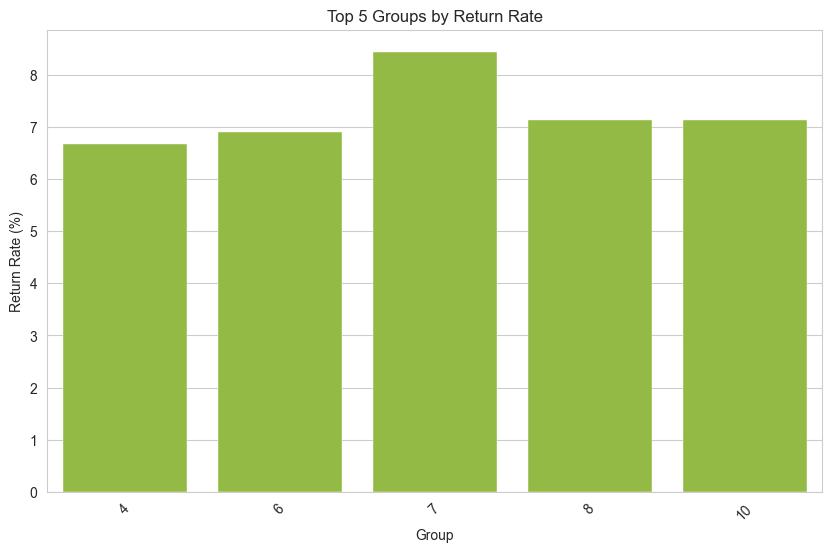

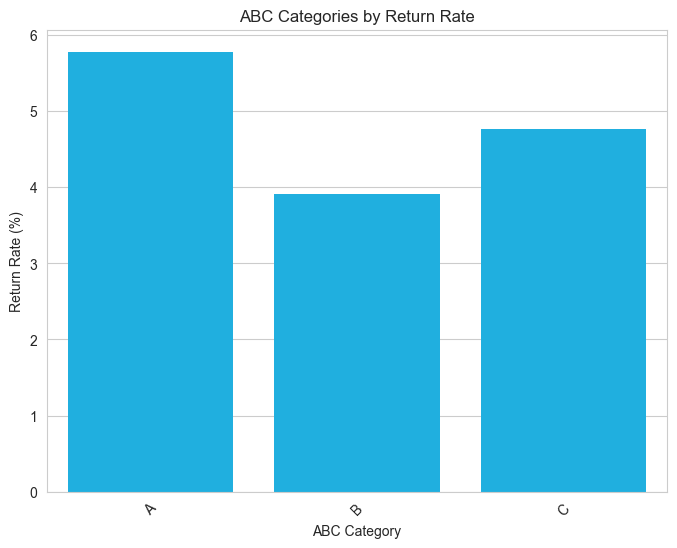

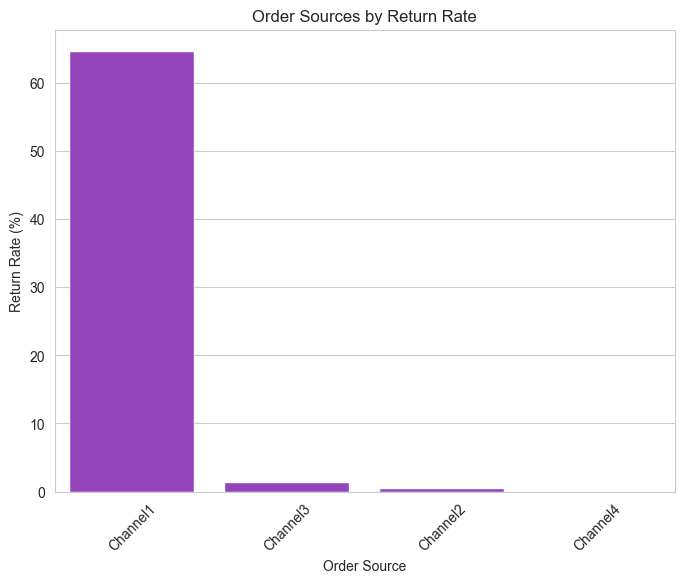

In [149]:
sns.set_style('whitegrid')

# Plot for top 5 groups
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_groups.index, y=top_5_groups.values, color="yellowgreen", linewidth=0.3)
plt.title('Top 5 Groups by Return Rate')
plt.xlabel('Group')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Plot for ABC categories
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_abc_return_rate.index, y=sorted_abc_return_rate.values, color="deepskyblue", linewidth=0.01)
plt.title('ABC Categories by Return Rate')
plt.xlabel('ABC Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Plot for order sources
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_order_source_return_rate.index, y=sorted_order_source_return_rate.values, color="darkorchid", linewidth=0.3)
plt.title('Order Sources by Return Rate')
plt.xlabel('Order Source')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()


In [150]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Product', 'Return Rate (%)', 'Percentage of Total Products'])

# Iterate over the top 5 products
for product_id, return_rate in top_5_products.items():
    # Filter the DataFrame for the current product and RETURN type
    filtered_df = df_ml_tr[(df_ml_tr['TYPE'] == 'RETURN') & (df_ml_tr['Product'] == product_id)]
    
    # Calculate the total quantity returned for the current product
    total_qty_returned = filtered_df['Qty'].sum()
    
    # Calculate the total quantity of all products of the current type
    total_qty_all_products = df_ml_tr[df_ml_tr['Product'] == product_id]['Qty'].sum()
    
    # Calculate the percentage of total products for the current product
    percentage_total_products = (total_qty_returned / total_qty_all_products) * 100
    
    # Append the results to the DataFrame
    results_df.loc[len(results_df)] = [product_id, return_rate, percentage_total_products]

# Print the results
print("Results:")
print(results_df)

Results:
   Product  Return Rate (%)  Percentage of Total Products
0   4481.0        11.811024                     40.516562
1   4460.0        10.869565                      7.942658
2   4486.0        10.294118                     65.026802
3   4455.0        10.256410                     25.310979
4   4450.0         8.808290                     59.528338


In [151]:
filtered_df = df_ml_tr[(df_ml_tr['TYPE']=='RETURN') & (df_ml_tr['Product']==4481)]
total_qty = filtered_df['Qty'].sum()
total_qty

4110

In [152]:
filtered_df_4481 = df_ml_tr[df_ml_tr['Product']==4481]
total_qty_4481 = filtered_df_4481['Qty'].sum()
total_qty_4481

10144

In [153]:
total_qty/total_qty_4481

0.4051656151419558

In [154]:
# Sort the products by return rate in descending order and select the top 5
top_5_products_return_rate = product_return_rate.sort_values(ascending=False).head(5)

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Product', 'Return Rate (%)', '(%) Total Products'])

# Iterate over the top 5 products by return rate
for product_id, return_rate in top_5_products_return_rate.items():
    # Filter the DataFrame for the current product and RETURN type
    filtered_df = df_ml_tr[(df_ml_tr['TYPE'] == 'RETURN') & (df_ml_tr['Product'] == product_id)]
    
    # Calculate the total quantity returned for the current product
    total_qty_returned = filtered_df['Qty'].sum()
    
    # Calculate the total quantity of all products of the current type
    total_qty_all_products = df_ml_tr[df_ml_tr['Product'] == product_id]['Qty'].sum()
    
    # Calculate the percentage of total products for the current product
    percentage_total_products = (total_qty_returned / total_qty_all_products) * 100
    
    # Append the results to the DataFrame
    results_df.loc[len(results_df)] = [product_id, return_rate, percentage_total_products]

# Sort the products by percentage of total products in descending order and select the top 5
top_5_products_percentage_total = results_df.sort_values(by='(%) Total Products', ascending=False).head(5)

# Print the top 5 products by percentage of total products
print("\nTop 5 Products by Percentage of Total Products:")
print(top_5_products_percentage_total)



Top 5 Products by Percentage of Total Products:
   Product  Return Rate (%)  (%) Total Products
2   4486.0        10.294118           65.026802
4   4450.0         8.808290           59.528338
0   4481.0        11.811024           40.516562
3   4455.0        10.256410           25.310979
1   4460.0        10.869565            7.942658


In [155]:
filtered_df_4486 = df_ml_tr[(df_ml_tr['TYPE']=='RETURN') & (df_ml_tr['Product']==4486)]
total_qty_4486_return = filtered_df_4486['Qty'].sum()
total_qty_4486_return

12980

In [156]:
filtered_df_4486 = df_ml_tr[df_ml_tr['Product']==4486]
total_qty_4486 = filtered_df_4486['Qty'].sum()
total_qty_4486

19961

In [157]:
total_qty_4486_return/total_qty_4486*100

65.02680226441561

In [158]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Product', 'Return Rate (%)', '(%) Total Products'])

# Iterate over all products
for product_id, return_rate in product_return_rate.items():
    # Filter the DataFrame for the current product and RETURN type
    filtered_df = df_ml_tr[(df_ml_tr['TYPE'] == 'RETURN') & (df_ml_tr['Product'] == product_id)]
    
    # Calculate the total quantity returned for the current product
    total_qty_returned = filtered_df['Qty'].sum()
    
    # Calculate the total quantity of all products of the current type
    total_qty_all_products = df_ml_tr[df_ml_tr['Product'] == product_id]['Qty'].sum()
    
    # Calculate the percentage of total products for the current product
    percentage_total_products = (total_qty_returned / total_qty_all_products) * 100
    
    # Append the results to the DataFrame
    results_df.loc[len(results_df)] = [product_id, return_rate, percentage_total_products]

# Sort the products by percentage of total products in descending order
sorted_products_percentage_total = results_df.sort_values(by='(%) Total Products', ascending=False)

# Print the sorted products by percentage of total products
print("\nProducts by Percentage of Total Products:")
print(sorted_products_percentage_total)


Products by Percentage of Total Products:
    Product  Return Rate (%)  (%) Total Products
28   4486.0        10.294118           65.026802
1    4450.0         8.808290           59.528338
33   4492.0         4.883463           57.710052
24   4482.0         3.821656           40.902829
23   4481.0        11.811024           40.516562
31   4490.0         6.849315           31.568481
14   4471.0         3.109656           30.637833
8    4464.0         6.376518           29.517273
35   4494.0         5.263158           27.027027
29   4488.0         4.060914           26.068020
3    4455.0        10.256410           25.310979
32   4491.0         3.797468           24.347022
10   4466.0         3.021978           24.286362
19   4476.0         2.723735           23.332387
25   4483.0         6.382979           23.330106
12   4468.0         3.623188           21.420519
34   4493.0         2.863535           21.156529
17   4474.0         2.884615           20.748051
7    4463.0         5.5555

In [159]:
sorted_products_percentage_total.mean()

Product               4474.621622
Return Rate (%)          4.892388
(%) Total Products      20.624217
dtype: float64

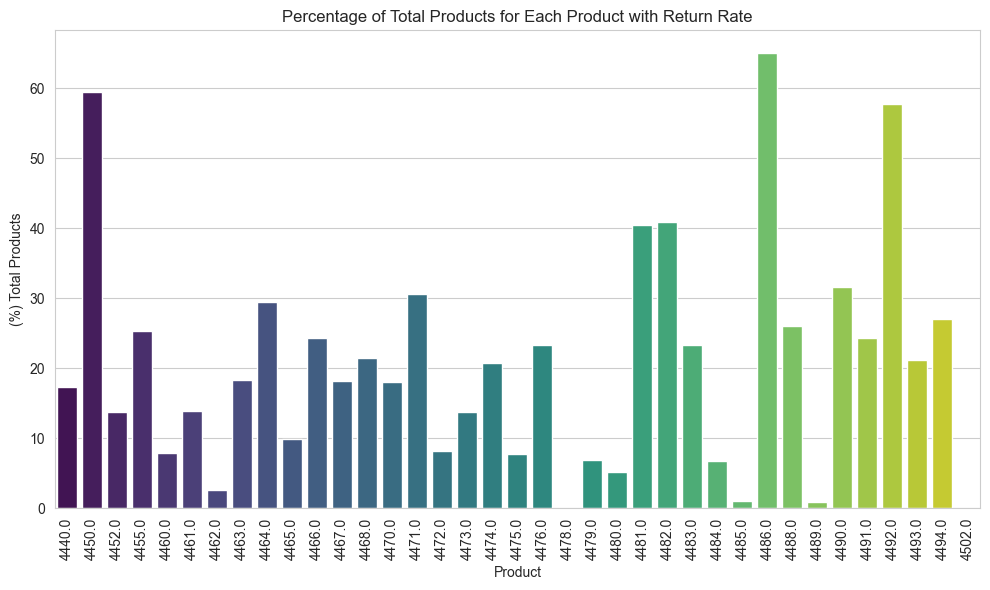

In [160]:

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='(%) Total Products', data=sorted_products_percentage_total, palette='viridis')
plt.xlabel('Product')
plt.ylabel('(%) Total Products')
plt.title('Percentage of Total Products for Each Product with Return Rate')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [161]:
df_4486 = df_ml_tr[df_ml_tr['Product']==4486]
df_4486

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year
1,2,57,17899,1,IT,7,2021-05-01,1,4486,2200,550.0,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,0,2,3,9,0,YES,C,176,2022
18,19,65,18718,1,NL,7,2022-01-25,1,4486,1270,317.5,0.25,2023-10-02,2023-09-25,RETURN,1270.0,Channel3,C7,L8,0,3,3,5,0,No,C,720,2022
136,137,17,19241,1,US,2,2022-08-08,3,4486,30,7.5,0.25,2022-08-08,2023-05-24,SALE,30.0,Channel2,C2,L2,0,1,4,11,0,No,C,684,2022
177,178,66,19468,0,NL,25,2022-11-06,2,4486,12,3.0,0.25,2023-10-02,2023-09-25,SALE,12.0,Channel2,C6,L9,0,3,1,13,0,No,C,3986,2022
301,302,65,19582,1,NL,25,2022-12-06,2,4486,4,1.0,0.25,2022-12-05,2022-12-25,SALE,4.0,Channel1,C13,L13,0,3,3,1,0,No,C,720,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15749,15750,66,20371,0,NL,17,2022-12-30,8,4486,2000,500.0,0.25,2024-01-02,2023-12-31,RETURN,2000.0,Channel2,C6,L9,0,3,3,5,0,No,C,3986,2022
15762,15763,58,20371,0,NL,25,2022-12-31,2,4486,40,10.0,0.25,2023-12-30,2023-03-08,RETURN,40.0,Channel1,C2,L2,0,2,3,5,0,No,C,176,2022
15839,15840,58,19663,0,US,17,2022-01-16,1,4486,60,15.0,0.25,2023-01-16,2023-02-01,RETURN,60.0,Channel1,C2,L2,0,2,3,7,0,No,C,176,2022
15852,15853,17,19241,1,US,2,2022-08-08,3,4486,30,7.5,0.25,2022-08-08,2023-05-24,SALE,30.0,Channel2,C2,L2,0,1,4,11,0,No,C,684,2022


In [162]:

ordersource_product_df = df_ml_tr[(df_ml_tr['Order Source']=='Channel2')&(df_ml_tr['Product']==4486)&(df_ml_tr['Customer Group']==3986)]
ordersource_product_df


,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year
177,178,66,19468,0,NL,25,2022-11-06,2,4486,12,3.00,0.25,2023-10-02,2023-09-25,SALE,12.0,Channel2,C6,L9,0,3,1,13,0,No,C,3986,2022
529,530,66,19594,0,NL,7,2022-12-12,1,4486,1000,250.00,0.25,2022-12-12,2023-01-09,SALE,1000.0,Channel2,C7,L8,1,3,3,2,0,No,C,3986,2022
576,577,66,19596,0,GB,2,2022-12-13,1,4486,2,0.50,0.25,2022-12-13,2023-02-15,SALE,2.0,Channel2,C7,L8,0,3,3,2,0,No,C,3986,2022
817,818,66,19608,0,NL,7,2022-12-18,1,4486,425,106.25,0.25,2022-12-18,2023-01-24,SALE,425.0,Channel2,C6,L9,0,3,3,3,0,No,C,3986,2022
846,847,66,19611,0,NL,7,2022-12-18,1,4486,35,8.75,0.25,2022-12-18,2023-01-15,SALE,35.0,Channel2,C6,L9,0,3,3,3,0,No,C,3986,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15736,15737,66,20369,0,NL,17,2022-12-30,11,4486,1,0.25,0.25,2024-01-02,2023-12-31,SALE,1.0,Channel2,C6,L9,0,3,3,5,0,No,C,3986,2022
15744,15745,66,20370,0,NL,17,2022-12-30,9,4486,2000,500.00,0.25,2024-01-02,2023-12-31,RETURN,2000.0,Channel2,C6,L9,0,3,3,5,0,No,C,3986,2022
15747,15748,66,20371,0,NL,17,2022-12-30,7,4486,2000,500.00,0.25,2024-01-02,2023-12-31,RETURN,2000.0,Channel2,C6,L9,0,3,3,5,0,No,C,3986,2022
15749,15750,66,20371,0,NL,17,2022-12-30,8,4486,2000,500.00,0.25,2024-01-02,2023-12-31,RETURN,2000.0,Channel2,C6,L9,0,3,3,5,0,No,C,3986,2022


In [163]:
df_4486['Order Source'].value_counts()

Order Source
Channel2    183
Channel1     18
Channel3      3
Name: count, dtype: int64

In [164]:
# Filter the DataFrame based on specific conditions
filtered_df = df_ml_tr[(df_ml_tr['Order Source'] == 'Channel2') &
                       (df_ml_tr['Product'] == 4486) &
                       (df_ml_tr['Customer Group'] == 3986)]

# Group by 'TYPE' and sum 'Qty'
sum_qty_by_type = filtered_df.groupby('TYPE')['Qty'].sum()
sum_qty_by_type

TYPE
RETURN    6000
SALE      3854
Name: Qty, dtype: int64

In [165]:
# Calculate the total sum of Qty for both RETURN and SALE
total_qty = sum_qty_by_type.sum()

# Calculate the proportion of RETURN orders relative to the total
return_proportion = sum_qty_by_type['RETURN'] / total_qty

# Display the proportion
print("Proportion of RETURN orders relative to the total: {:.2%}".format(return_proportion))

Proportion of RETURN orders relative to the total: 60.89%


This means that 60.89% of orders from channel 2 for product 4486 ad customer group 3986 are returned

attempting to calculate the overal

In [166]:
# Filter the DataFrame based on specific conditions
filtered_df_channel2 = df_ml_tr[(df_ml_tr['Order Source'] == 'Channel2')]
                       

# Group by 'TYPE' and sum 'Qty'
sum_qty_by_type_channel2 = filtered_df_channel2.groupby('TYPE')['Qty'].sum()
sum_qty_by_type_channel2

TYPE
RETURN    108140
SALE      733395
Name: Qty, dtype: int64

In [167]:
# Calculate the total sum of Qty for both RETURN and SALE
total_qty_channel2 = sum_qty_by_type_channel2.sum()

# Calculate the proportion of RETURN orders relative to the total
return_proportion_channel2 = sum_qty_by_type_channel2['RETURN'] / total_qty_channel2

# Display the proportion
print("Proportion of RETURN orders relative to the total: {:.2%}".format(return_proportion_channel2))

Proportion of RETURN orders relative to the total: 12.85%


In [168]:
# Filter the DataFrame to include only rows where the type is 'RETURN' and Order Source is 'Channel1'
return_channel1_df = df_ml_tr[(df_ml_tr['TYPE'] == 'RETURN') & (df_ml_tr['Order Source'] == 'Channel1')]

# Display the filtered DataFrame
return_channel1_df

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year
0,1,57,17592,1,US,7,2021-01-23,8,4482,250,112.5,0.45,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,0,2,3,4,0,YES,C,176,2022
1,2,57,17899,1,IT,7,2021-05-01,1,4486,2200,550.0,0.25,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,0,2,3,9,0,YES,C,176,2022
28,29,57,18796,1,NL,2,2022-02-21,14,4440,20,142.8,7.14,2022-02-21,2023-02-21,RETURN,20.0,Channel1,C2,L2,0,2,3,2,0,YES,C,176,2022
46,47,57,18835,1,BE,2,2022-03-01,10,4440,40,285.6,7.14,2022-03-01,2023-02-21,RETURN,40.0,Channel1,C2,L2,0,2,3,2,0,YES,C,176,2022
126,127,57,19141,1,US,2,2022-07-12,1,4455,100,3144.0,31.44,2022-07-18,2023-01-31,RETURN,100.0,Channel1,C2,L2,0,2,3,7,0,YES,B,176,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15841,15842,57,19670,1,NL,8,2022-01-18,1,4472,170,23.8,0.14,2023-01-18,2023-01-24,RETURN,170.0,Channel1,C2,L2,0,2,3,7,0,YES,C,176,2022
15842,15843,57,19670,1,US,29,2022-01-20,2,4483,80,4010.4,50.13,2023-01-21,2023-01-24,RETURN,80.0,Channel1,C2,L2,0,2,3,8,0,YES,A,176,2022
15843,15844,57,19670,1,US,7,2022-01-20,1,4461,80,19.2,0.24,2023-01-21,2023-01-24,RETURN,80.0,Channel1,C2,L2,0,2,3,8,0,YES,C,176,2022
15844,15845,58,19673,0,DE,29,2022-01-22,3,4493,250,800.0,3.20,2023-01-22,2023-02-06,RETURN,250.0,Channel1,C2,L2,0,2,3,8,0,No,B,176,2022


In [169]:
# Get value counts for the 'ID' column
id_counts = return_channel1_df['ID'].value_counts()

# Display the value counts
print(id_counts)

ID
57    379
58    323
65      1
Name: count, dtype: int64


In [170]:
overall_id_counts = df_ml_tr['ID'].value_counts()
print(overall_id_counts)

ID
66    6116
17    4080
54    2637
65    1118
55     950
57     381
58     341
75     267
Name: count, dtype: int64


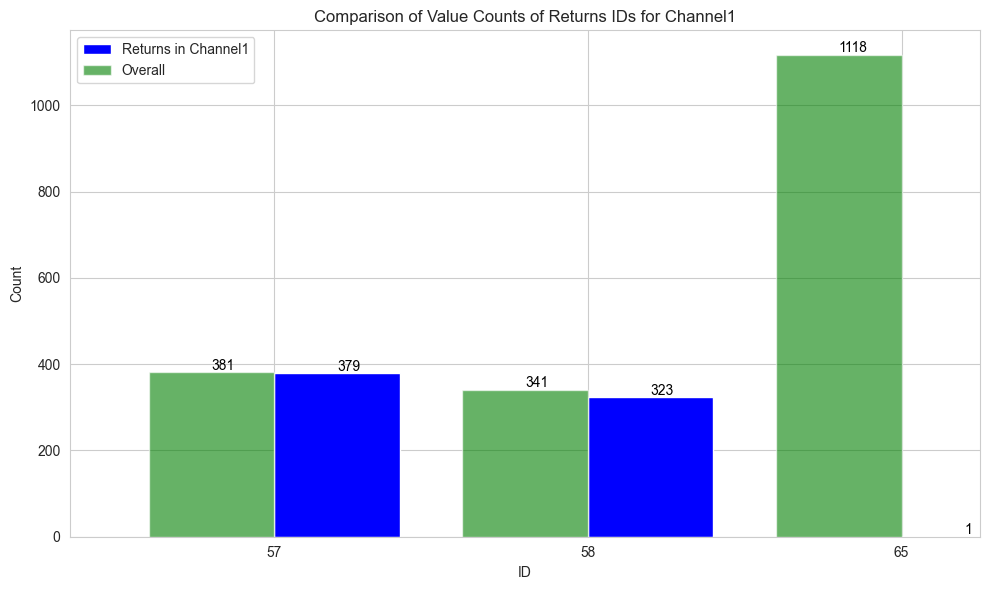

In [171]:
# Get value counts for the overall dataset
overall_id_counts_filtered = overall_id_counts.loc[id_counts.index]

# Align the indexes
id_counts_aligned = id_counts.reindex(overall_id_counts_filtered.index, fill_value=0)

# Plot both value counts
plt.figure(figsize=(10, 6))

# Plot value counts for returns in Channel1
id_counts_aligned.plot(kind='bar', color='blue', label='Returns in Channel1', position=0, width=0.4)

# Plot overall value counts for IDs present in returns
overall_id_counts_filtered.plot(kind='bar', color='green', alpha=0.6, label='Overall', position=1, width=0.4)

# Annotate the values for the "Returns in Channel1" barsori bars
for i, value in enumerate(id_counts_aligned):
    plt.text(i + 0.2, value + 5, str(value), color='black')

# Annotate the values for the "Overall"
for i, value in enumerate(overall_id_counts_filtered):
    plt.text(i - 0.2, value + 5, str(value), color='black')

plt.title('Comparison of Value Counts of Returns IDs for Channel1')
plt.xlabel('ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

In [172]:
### Chi2, like correlation is one metric to measure the relationship between categories
stats.chi2_contingency(pd.crosstab(df_ml_tr['Strat Customer'], df_ml_tr['TYPE']))
## here we see that there are significant difference between the groups (Class) that could explain our target = customer satisfaction 


Chi2ContingencyResult(statistic=7783.025549424384, pvalue=0.0, dof=2, expected_freq=array([[7.28047703e+02, 1.45139523e+04],
       [1.81988043e+01, 3.62801196e+02],
       [1.27534928e+01, 2.54246507e+02]]))

In [173]:
## we decided then to be more productive using  proper tools for data mining 
## by selecting all categories from our dataframe... we have the entire list of categories
catcol = df_ml_tr.select_dtypes(include=['object']).columns


In [174]:
### apply chi2 for every single category 
results_list = []
for var1 in catcol:
      contingency_table = pd.crosstab(df_ml_tr['TYPE'],df_ml_tr[var1])
      chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
      results_list.append({
        'Variable': var1,
        'Chi2': chi2,
        'P-value': p,
        'Degrees of Freedom': dof
       
    })

results_df = pd.DataFrame(results_list)
results_df

,Variable,Chi2,P-value,Degrees of Freedom
0,Destination,28.354186,0.008074,13
1,TYPE,15868.022002,0.000000,1
2,Order Source,9185.874573,0.000000,3
3,Logistic Partner,4353.939764,0.000000,12
4,Deposit,4353.939764,0.000000,12
5,Strat Customer,7783.025549,0.000000,2


Interpretation:

For each variable, the p-value is very low (close to 0), indicating strong evidence to reject the null hypothesis of independence between the variable and the 'TYPE' variable.

The high chi-squared values further support the conclusion that there is a significant relationship between each variable and the 'TYPE' variable.

Therefore, based on these results, it can be inferred that 'Destination', 'Order Source', 'Logistic Partner', 'Deposit', and 'Strat Customer' are significantly associated with the type of transaction ('TYPE').

In [175]:
df_ml_tr.dtypes

ID_Record                    int64
ID                           int64
Entry ID                     int64
Strategic Sale               int64
Destination                 object
Group                        int64
Date                datetime64[ns]
Sequence                     int64
Product                      int64
Qty                          int64
Total Value                float64
Unit Price                 float64
Planned Date        datetime64[ns]
Delivered Date      datetime64[ns]
TYPE                        object
Qty Delivered              float64
Order Source                object
Logistic Partner            object
Deposit                     object
Replacement                  int64
Market Demand                int64
Quarter                      int64
Week                         int64
Strateg Prod                 int64
Strat Customer              object
ABC                       category
Customer Group               int64
Year                         int64
dtype: object

In [176]:

### lets copy the dataframe and call as category just to make sure that we are dealing with categories and they ALL will be encoded.. 
df_ml_tr_cat = df_ml_tr.copy()
catcol

Index(['Destination', 'TYPE', 'Order Source', 'Logistic Partner', 'Deposit',
       'Strat Customer'],
      dtype='object')

In [177]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'ABC' column
df_ml_tr_cat['ABC_encoded'] = label_encoder.fit_transform(df_ml_tr_cat['ABC'])

catcol

Index(['Destination', 'TYPE', 'Order Source', 'Logistic Partner', 'Deposit',
       'Strat Customer'],
      dtype='object')

In [178]:
### enconding dt_survey_cat for all columns - datatype = category 
for col in catcol:
    df_ml_tr_cat[col] = df_ml_tr_cat[col].astype('category').cat.codes

In [179]:
## here you can see the dataset was converted)
df_ml_tr_cat

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group,Year,ABC_encoded
0,1,57,17592,1,13,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,0,250.0,0,5,5,0,2,3,4,0,1,C,176,2022,2
1,2,57,17899,1,9,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,0,2200.0,0,5,5,0,2,3,9,0,1,C,176,2022,2
2,3,66,18072,0,10,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,1,30.0,1,9,12,0,3,4,1,0,0,C,3986,2022,2
3,4,17,18181,1,13,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,1,62.0,1,5,5,0,1,3,9,0,0,C,684,2022,2
4,5,55,18335,1,2,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,1,250.0,1,9,12,0,3,4,12,0,0,C,521,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,17,19580,1,13,25,2022-12-04,3,4493,1,3.20,3.20,2022-12-04,2023-02-27,1,1.0,1,10,11,1,1,3,1,0,0,B,684,2022,1
15886,15887,17,19580,1,13,21,2022-12-04,1,4493,8,25.60,3.20,2022-12-04,2022-12-20,1,8.0,1,3,3,0,1,3,1,0,0,B,684,2022,1
15887,15888,17,19580,1,13,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,1,9.0,1,3,3,0,1,3,1,0,0,A,684,2022,0
15888,15889,17,19580,1,13,17,2022-12-04,4,4467,9,42.39,4.71,2022-12-04,2023-01-17,1,9.0,1,3,3,0,1,3,1,0,0,A,684,2022,0


In [180]:
# sns.pairplot(df_ml_tr_cat)

In [1]:
# Identify numerical columns
numerical_columns = df_ml_tr_cat.select_dtypes(include=['number']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Min-max scale each numerical column
df_ml_tr_cat[numerical_columns] = scaler.fit_transform(df_ml_tr_cat[numerical_columns])

df_ml_tr_cat


NameError: name 'dataset' is not defined

In [182]:
# Drop date columns and TYPE, Qty, and Qty Delivered columns from df_ml_tr_cat
columns_to_drop = ['Date', 'Delivered Date', 'Planned Date','ABC']
df_ml_tr_cat_no_date = df_ml_tr_cat.drop(columns=columns_to_drop) 

# Call the library SelectKBest, and passing 'all' since we want to submit all categories to this selection 
ModelSelect = SelectKBest(score_func=f_classif, k='all')

# Fit the model and calculate the score for all categories that can explain TYPE 
fit = ModelSelect.fit(df_ml_tr_cat_no_date, df_ml_tr_cat_no_date['TYPE'])

# Save the columns into a variable - here is filter 
filter = ModelSelect.get_support(indices=True)

filter

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [183]:
# Restore the name of the columns according to the filter position of the column
features_selected = df_ml_tr_cat_no_date.iloc[:, filter]

# Get all the scores for each column that contributed to the TYPE
feature_scores = fit.scores_

### the map of the treasure is too messy.. let's see how we can improve that... 
feature_scores

array([2.29192824e+02, 8.73748439e+01, 8.00753100e+01, 3.39169380e+01,
       1.88261870e+01, 1.06229061e+01, 7.12505146e+01, 1.44293935e+01,
       4.64343409e+02, 1.10733514e+02, 1.27702689e-01,            inf,
       4.64343409e+02, 7.34969443e+03, 4.38985135e+02, 4.83990682e+02,
       3.95795107e+01, 2.23281086e+00, 2.93803045e+02, 1.24999402e+01,
                  nan, 2.10070531e+03, 9.78536905e+02,            nan,
       3.90757786e+00])

Text(0.5, 0, 'Score')

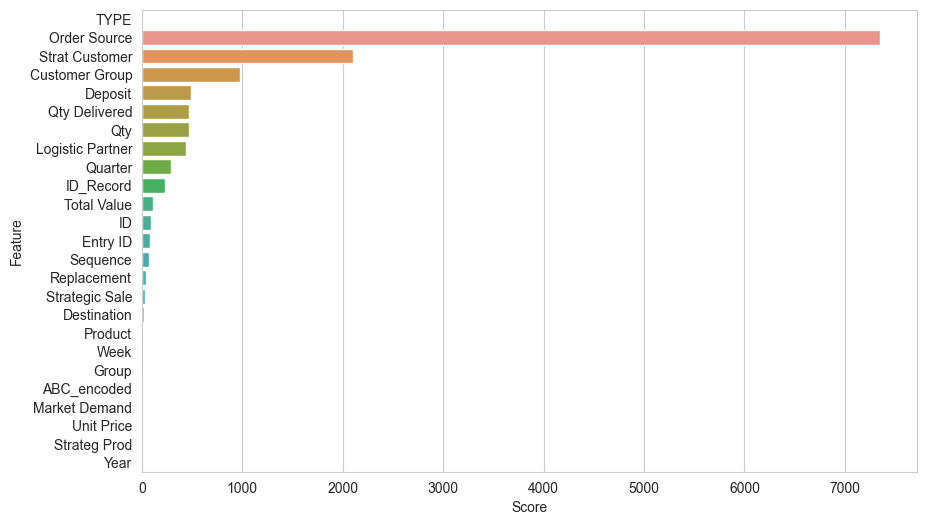

In [184]:
# Create a DataFrame with feature selected and feature_scores
df_scores = pd.DataFrame({'Feature': features_selected.columns, 'Score': feature_scores})

# Sort the DataFrame by scores in descending order
df_scores = df_scores.sort_values(by='Score', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=df_scores)
plt.xlabel('Score')

In [185]:
# Exclude TYPE, Qty, and Qty Delivered from the top features
excluded_columns = ['TYPE']#, 'Qty', 'Qty Delivered']
top_features = df_scores[~df_scores['Feature'].isin(excluded_columns)].head(8)
# Filter the original DataFrame with top features
new_df = df_ml_tr_cat_no_date[top_features['Feature']]

new_df



,Order Source,Strat Customer,Customer Group,Deposit,Qty Delivered,Qty,Logistic Partner,Quarter
0,0.000000,0.5,0.000000,0.416667,0.022037,0.022037,0.416667,0.666667
1,0.000000,0.5,0.000000,0.416667,0.194619,0.194619,0.416667,0.666667
2,0.333333,0.0,1.000000,1.000000,0.002567,0.002567,0.750000,1.000000
3,0.333333,0.0,0.133333,0.416667,0.005399,0.005399,0.416667,0.666667
4,0.333333,0.0,0.090551,1.000000,0.022037,0.022037,0.750000,1.000000
...,...,...,...,...,...,...,...,...
15885,0.333333,0.0,0.133333,0.916667,0.000000,0.000000,0.833333,0.666667
15886,0.333333,0.0,0.133333,0.250000,0.000620,0.000620,0.250000,0.666667
15887,0.333333,0.0,0.133333,0.250000,0.000708,0.000708,0.250000,0.666667
15888,0.333333,0.0,0.133333,0.250000,0.000708,0.000708,0.250000,0.666667
